<center>
# МЕТОДИЧЕСКАЯ ИНСТРУКЦИЯ ПО РЕШЕНИЮ ЗАДАЧИ ПРЕДСКАЗАНИЯ ОТКЛИКА ОТП БАНКА

In [1]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

# Считывание CSV-файла в объект DataFrame

In [2]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 60)
# загружаем набор данных
data = pd.read_csv("C:/Trees/Credit_OTP.csv", encoding='cp1251', sep = ';')
# выводим первые 5 наблюдений
data.head()

AGREEMENT_RK  TARGET  AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  GENDER  \
0      59910150       0   49                  1                  0       1   
1      59910230       0   32                  1                  0       1   
2      59910525       0   52                  1                  0       1   
3      59910803       0   39                  1                  0       1   
4      59911781       0   30                  1                  0       0   

   CHILD_TOTAL  DEPENDANTS            EDUCATION  MARITAL_STATUS  \
0            2           1  Среднее специальное  Состою в браке   
1            3           3              Среднее  Состою в браке   
2            4           0     Неполное среднее  Состою в браке   
3            1           1               Высшее  Состою в браке   
4            0           0              Среднее  Состою в браке   

                GEN_INDUSTRY                    GEN_TITLE  \
0                   Торговля                      Рабочий   
1                   Торговля                      Рабочий   
2  Информационные технологии                   Специалист   
3                Образование  Руководитель среднего звена   
4     Государственная служба                   Специалист   

                     ORG_TP_STATE ORG_TP_FCAPITAL  \
0                Частная компания     Без участия   
1  Индивидуальный предприниматель     Без участия   
2    Государственная комп./учреж.     Без участия   
3    Государственная комп./учреж.     Без участия   
4    Государственная комп./учреж.     Без участия   

                         JOB_DIR           FAMILY_INCOME PERSONAL_INCOME  \
0    Вспомогательный техперсонал  от 10000 до 20000 руб.            5000   
1  Участие в основ. деятельности  от 10000 до 20000 руб.           12000   
2  Участие в основ. деятельности  от 10000 до 20000 руб.            9000   
3  Участие в основ. деятельности  от 20000 до 50000 руб.           25000   
4  Участие в основ. деятельности  от 10000 до 20000 руб.           12000   

   REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE  \
0  Оренбургская область  Оренбургская область    Оренбургская область   
1    Кабардино-Балкария    Кабардино-Балкария      Кабардино-Балкария   
2     Иркутская область     Иркутская область       Иркутская область   
3    Ростовская область    Ростовская область      Ростовская область   
4    Кабардино-Балкария    Кабардино-Балкария      Кабардино-Балкария   

            TP_PROVINCE           REGION_NM  REG_FACT_FL  FACT_POST_FL  \
0  Оренбургская область          ПОВОЛЖСКИЙ            1             1   
1   Ставропольский край               ЮЖНЫЙ            1             1   
2     Иркутская область  ВОСТОЧНО-СИБИРСКИЙ            1             1   
3    Ростовская область               ЮЖНЫЙ            0             1   
4   Ставропольский край               ЮЖНЫЙ            1             1   

   REG_POST_FL  REG_FACT_POST_FL  REG_FACT_POST_TP_FL  FL_PRESENCE_FL  \
0            1                 1                    1               0   
1            1                 1                    0               0   
2            1                 1                    1               0   
3            0                 0                    1               1   
4            1                 1                    0               0   

   OWN_AUTO  AUTO_RUS_FL  HS_PRESENCE_FL  COT_PRESENCE_FL  GAR_PRESENCE_FL  \
0         0            0               0                0                0   
1         0            0               0                0                0   
2         0            0               1                0                0   
3         0            0               0                0                0   
4         0            0               1                0                0   

   LAND_PRESENCE_FL   CREDIT  TERM FST_PAYMENT  DL_DOCUMENT_FL  \
0                 0     8000     6        8650               0   
1                 0    21650     6        4000               0  

In [3]:
# выводим информацию о количестве непропущенных 
# наблюдений в переменных и типах переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

# Преобразование типов переменных

In [4]:
# преобразуем указанные переменные в тип object
for i in ['AGREEMENT_RK', 'TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
          'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE',
          'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM',
          'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
          'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 'HS_PRESENCE_FL',
          'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL',
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL']:
    if i in data.columns:
        data[i]=data[i].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию. 

Обратите внимание, что в pandas по умолчанию в качестве десятичного разделителя используется точка, а не запятая. Количественная переменная со значениями, в которых в качестве десятичного разделителя используется запятая вместо точки, будет неверно записана как категориальная (то есть ей будет неверно присвоен тип `object`).

In [5]:
# в указанных переменных заменяем запятую на точку в качестве
# десятичного разделителя и преобразуем в тип float
for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    if i in data.columns:
        data[i] = data[i].str.replace(',', '.').astype('float')

# Импутация пропусков, не использующая результаты математических вычислений (т.е. которую можно выполнять до/после разбиения на обучение/контроль)

In [6]:
# если в интересующей нас переменной есть пропуск 
# и при этом переменная SOCSTATUS_PENS_FL имеет значение 1,
# заменяем такие пропуски меткой "Не указано"
data['GEN_INDUSTRY'] = np.where(data['GEN_INDUSTRY'].isnull() | (data['SOCSTATUS_PENS_FL']==1), 
                                'Не указано', data['GEN_INDUSTRY'])
data['GEN_TITLE'] = np.where(data['GEN_TITLE'].isnull() | (data['SOCSTATUS_PENS_FL']==1), 
                             'Не указано', data['GEN_TITLE'])
data['ORG_TP_STATE'] = np.where(data['ORG_TP_STATE'].isnull() | (data['SOCSTATUS_PENS_FL']==1),
                                'Не указано', data['ORG_TP_STATE'])
data['ORG_TP_FCAPITAL'] = np.where(data['ORG_TP_FCAPITAL'].isnull() | (data['SOCSTATUS_PENS_FL']==1), 
                                   'Не указано', data['ORG_TP_FCAPITAL'])

# заменяем пропуски в указанных переменных
# меткой "Не указано"
data['JOB_DIR']=np.where(data['JOB_DIR'].isnull(), 'Не указано', data['JOB_DIR'])
data['TP_PROVINCE']=np.where(data['TP_PROVINCE'].isnull(), 'Не указано', data['TP_PROVINCE'])
data['REGION_NM']=np.where(data['REGION_NM'].isnull(), 'Не указано', data['REGION_NM'])

# заменяем пропуски в переменной 
# PREVIOUS_CARD_NUM_UTILIZED нулями
data['PREVIOUS_CARD_NUM_UTILIZED']=np.where(data['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 0, 
                                            data['PREVIOUS_CARD_NUM_UTILIZED'])

# Обработка редких категорий

In [7]:
# выделяем категориальные переменные в группу
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

# выводим статистики по категориальным переменным,
# смотрим unique - количество уникальных значений,
# выявляем бесполезные переменные - переменные, у
# которых уникальных переменных столько, сколько
# наблюдений (AGREEMENT_RK), и переменные с одним
# уникальным значением (DL_DOCUMENT_FL)
data[categorical_columns].describe()

AGREEMENT_RK  TARGET  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  GENDER  \
count          15223   15223              15223              15223   15223   
unique         15223       2                  2                  2       2   
top         64585727       0                  1                  0       1   
freq               1   13411              13847              13176    9964   

                  EDUCATION  MARITAL_STATUS GEN_INDUSTRY   GEN_TITLE  \
count                 15223           15223        15223       15223   
unique                    7               5           32          13   
top     Среднее специальное  Состою в браке     Торговля  Специалист   
freq                   6518            9416         2303        6680   

            ORG_TP_STATE ORG_TP_FCAPITAL                        JOB_DIR  \
count              15223           15223                          15223   
unique                 6               3                             11   
top     Частная компания     Без участия  Участие в основ. деятельности   
freq                6267           13009                          11452   

                 FAMILY_INCOME REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE  \
count                    15223                15223                 15223   
unique                       5                   81                    81   
top     от 10000 до 20000 руб.  Кемеровская область   Кемеровская область   
freq                      7077                  674                   674   

       POSTAL_ADDRESS_PROVINCE         TP_PROVINCE REGION_NM  REG_FACT_FL  \
count                    15223               15223     15223        15223   
unique                      80                  71        12            2   
top        Кемеровская область  Краснодарский край     ЮЖНЫЙ            1   
freq                       674                 790      2179        12765   

        FACT_POST_FL  REG_POST_FL  REG_FACT_POST_FL  REG_FACT_POST_TP_FL  \
count          15223        15223             15223                15223   
unique             2            2                 2                    2   
top                1            1                 1                    1   
freq           14480        13493             12758                13782   

        FL_PRESENCE_FL  AUTO_RUS_FL  HS_PRESENCE_FL  COT_PRESENCE_FL  \
count            15223        15223           15223            15223   
unique               2            2               2                2   
top                  0            0               0                0   
freq             10507        14097           11940            15074   

        GAR_PRESENCE_FL  LAND_PRESENCE_FL  DL_DOCUMENT_FL  GPF_DOCUMENT_FL  \
count             15223             15223           15223            15223   
unique                2                 2               1                2   
top                   0                 0               0                1   
freq              14930             14558           15223             8961   

        FACT_PHONE_FL  REG_PHONE_FL  GEN_PHONE_FL  
count           15223         15223         15223  
unique              2             2             2  
top                 1             0             1  
freq             9311         14389         13855

In [8]:
# удаляем идентификационную переменную AGREEMENT_RK,
# потому что у нее количество уникальных значений
# равно количеству наблюдений
data.drop('AGREEMENT_RK', axis=1, inplace=True)

# удаляем переменную DL_DOCUMENT_FL, потому что 
# у нее одно уникальное значение
data.drop(['DL_DOCUMENT_FL'], axis=1, inplace=True)

In [9]:
# заново выделим категориальные переменные в группу
# и пробежим по ней, выводя частоты категорий
# по каждой категориальной переменной, чтобы
# выявить редкие категории
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

0    13411
1     1812
Name: TARGET, dtype: int64
1    13847
0     1376
Name: SOCSTATUS_WORK_FL, dtype: int64
0    13176
1     2047
Name: SOCSTATUS_PENS_FL, dtype: int64
1    9964
0    5259
Name: GENDER, dtype: int64
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64
Состою в браке        9416
Не состоял в браке    3622
Разведен(а)           1245
Вдовец/Вдова           588
Гражданский брак       352
Name: MARITAL_STATUS, dtype: int64
Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1639
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование

In [10]:
# заменяем категорию "Не указано" на категорию "ЮЖНЫЙ"
data['REGION_NM']=np.where(data['REGION_NM']=='Не указано', 'ЮЖНЫЙ', data['REGION_NM'])

# заменяем неверную категорию "ПОВОЛЖСКИЙ" на категорию "ПРИВОЛЖСКИЙ"
data.at[data['REGION_NM'] == 'ПОВОЛЖСКИЙ', 'REGION_NM'] = 'ПРИВОЛЖСКИЙ'

# записываем редкие категории в одну отдельную категорию
for i in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
    if i in data.columns:
        data[i]=np.where((data[i]=='Москва') \
                         | (data[i]=='Хакасия') \
                         | (data[i]=='Ямало-Ненецкий АО') \
                         | (data[i]=='Магаданская область') \
                         | (data[i]=='Калмыкия') \
                         | (data[i]=='Дагестан') \
                         | (data[i]=='Агинский Бурятский АО') \
                         | (data[i]=='Усть-Ордынский Бурятский АО') \
                         | (data[i]=='Эвенкийский АО') \
                         | (data[i]=='Коми-Пермяцкий АО') \
                         | (data[i]=='Чечня'), 
                         'ДРУГОЕ', data['REG_ADDRESS_PROVINCE'])


data['TP_PROVINCE']=np.where((data['TP_PROVINCE']=='Сахалинская область') \
                             | (data['TP_PROVINCE']=='Еврейская АО') \
                             | (data['TP_PROVINCE']=='Магаданская область') \
                             | (data['TP_PROVINCE']=='Москва') \
                             | (data['TP_PROVINCE']=='Кабардино-Балкария'), 
                             'ДРУГОЕ',
                             data['TP_PROVINCE'])

In [11]:
# давайте убедимся, что в указанных переменных 
# появилось новое уникальное значение ДРУГОЕ
reg_columns = ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE']
for c in reg_columns:
    print(data[c].value_counts())

Краснодарский край         674
Кемеровская область        674
Алтайский край             459
Читинская область          426
Приморский край            416
Ростовская область         407
Свердловская область       349
Волгоградская область      331
Саратовская область        331
Воронежская область        301
Вологодская область        292
Челябинская область        292
Омская область             287
Татарстан                  287
Кировская область          264
Архангельская область      257
Оренбургская область       253
Тульская область           252
Хабаровский край           252
Красноярский край          239
Самарская область          235
Башкирия                   222
Курская область            217
Белгородская область       215
Новосибирская область      214
Липецкая область           206
Иркутская область          202
Тюменская область          199
Бурятия                    196
Ярославская область        194
                          ... 
Мордовская республика      167
Ульяновс

In [12]:
# укрупняем категории переменной EDUCATION
data.at[data['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
data.at[data['EDUCATION'] == 'Два и более высших образования', 'EDUCATION'] = 'Высшее'

# смотрим частоты категорий переменной EDUCATION
data['EDUCATION'].value_counts(dropna=False)

Среднее специальное    6518
Среднее                4679
Высшее                 3154
Неоконченное высшее     532
Неполное среднее        340
Name: EDUCATION, dtype: int64

In [13]:
# записываем некоторые категории переменной GEN_INDUSTRY 
# в отдельную категорию
data.at[data['GEN_INDUSTRY'] == 'Юридические услуги/нотариальные услуги', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Страхование', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Туризм', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Недвижимость', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Управляющая компания', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Логистика', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Подбор персонала', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'Другие сферы'

# смотрим частоты категорий переменной GEN_INDUSTRY
data['GEN_INDUSTRY'].value_counts(dropna=False)

Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1776
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование                                   923
Транспорт                                     763
Сельское хозяйство                            670
Строительство                                 556
Коммунальное хоз-во/Дорожные службы           495
Ресторанный бизнес/Общественное питание       393
Наука                                         361
Нефтегазовая промышленность                   220
Банк/Финансы                                  168
Сборочные производства                        167
Энергетика                                    139
Развлечения/Искусство                         129
ЧОП/Детективная д-ть                          128
Информационные услуги                         102


In [14]:
# укрупняем категории переменной GEN_TITLE
data.at[data['GEN_TITLE'] == 'Партнер', 'GEN_TITLE'] = 'Другое'
data.at[data['GEN_TITLE'] == 'Военнослужащий по контракту', 'GEN_TITLE'] = 'Другое'

# смотрим частоты категорий переменной GEN_TITLE
data['GEN_TITLE'].value_counts(dropna=False)

Специалист                        6680
Рабочий                           2898
Не указано                        2048
Служащий                           858
Руководитель среднего звена        657
Работник сферы услуг               529
Высококвалифиц. специалист         529
Руководитель высшего звена         409
Другое                             272
Индивидуальный предприниматель     210
Руководитель низшего звена         133
Name: GEN_TITLE, dtype: int64

In [15]:
# укрупняем категории переменной ORG_TP_STATE
data.at[data['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 'ORG_TP_STATE'] = 'Частная компания'

# смотрим частоты категорий переменной ORG_TP_STATE
data['ORG_TP_STATE'].value_counts(dropna=False)

Частная компания                  6288
Государственная комп./учреж.      5726
Не указано                        2048
Индивидуальный предприниматель     930
Некоммерческая организация         231
Name: ORG_TP_STATE, dtype: int64

In [16]:
# укрупняем категории переменной JOB_DIR
data.at[data['JOB_DIR'] == 'Реклама и маркетинг', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Кадровая служба и секретариат', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Пр-техн. обесп. и телеком.', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Юридическая служба', 'JOB_DIR'] = 'Другое'

# смотрим частоты категорий переменной JOB_DIR
data['JOB_DIR'].value_counts(dropna=False)

Участие в основ. деятельности    11452
Не указано                        1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Другое                             238
Снабжение и сбыт                   217
Служба безопасности                164
Name: JOB_DIR, dtype: int64

# Конструирование новых признаков, не использующее результаты математических вычислений (т.е. которое можно выполнять до/после разбиения на обучение/контроль)

In [17]:
# создаем переменную FACT_TP_FL, которая принимает значение 1, если 
# область фактического пребывания клиента и область торговой точки, 
# где клиент брал последний кредит, совпадают, или 0
# в противном случае
data['FACT_TP_FL'] = np.where(data['FACT_ADDRESS_PROVINCE']==data['TP_PROVINCE'], 1, 0).astype('object')

# создаем переменную AUTO_FOR_FL, которая принимает значение 1, если 
# у клиента есть один или несколько иностранных автомобилей, или
# 0 в противном случае
data['AUTO_FOR_FL'] = np.where((data['AUTO_RUS_FL']=='0') | (data['OWN_AUTO']>0), 1, 0).astype('object')

In [18]:
# пишем функцию, которая создает переменную 
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)    

In [19]:
# создаем переменную - результат конъюнкции
# GENDER и FAMILY_INCOME
make_conj(data, 'GENDER', 'FAMILY_INCOME')
# выводим первые 5 наблюдений
data.head()

TARGET  AGE SOCSTATUS_WORK_FL SOCSTATUS_PENS_FL GENDER  CHILD_TOTAL  \
0      0   49                 1                 0      1            2   
1      0   32                 1                 0      1            3   
2      0   52                 1                 0      1            4   
3      0   39                 1                 0      1            1   
4      0   30                 1                 0      0            0   

   DEPENDANTS            EDUCATION  MARITAL_STATUS               GEN_INDUSTRY  \
0           1  Среднее специальное  Состою в браке                   Торговля   
1           3              Среднее  Состою в браке                   Торговля   
2           0     Неполное среднее  Состою в браке  Информационные технологии   
3           1               Высшее  Состою в браке                Образование   
4           0              Среднее  Состою в браке     Государственная служба   

                     GEN_TITLE                    ORG_TP_STATE  \
0                      Рабочий                Частная компания   
1                      Рабочий  Индивидуальный предприниматель   
2                   Специалист    Государственная комп./учреж.   
3  Руководитель среднего звена    Государственная комп./учреж.   
4                   Специалист    Государственная комп./учреж.   

  ORG_TP_FCAPITAL                        JOB_DIR           FAMILY_INCOME  \
0     Без участия    Вспомогательный техперсонал  от 10000 до 20000 руб.   
1     Без участия  Участие в основ. деятельности  от 10000 до 20000 руб.   
2     Без участия  Участие в основ. деятельности  от 10000 до 20000 руб.   
3     Без участия  Участие в основ. деятельности  от 20000 до 50000 руб.   
4     Без участия  Участие в основ. деятельности  от 10000 до 20000 руб.   

   PERSONAL_INCOME  REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE  \
0           5000.0  Оренбургская область  Оренбургская область   
1          12000.0    Кабардино-Балкария    Кабардино-Балкария   
2           9000.0     Иркутская область     Иркутская область   
3          25000.0    Ростовская область    Ростовская область   
4          12000.0    Кабардино-Балкария    Кабардино-Балкария   

  POSTAL_ADDRESS_PROVINCE           TP_PROVINCE           REGION_NM  \
0    Оренбургская область  Оренбургская область         ПРИВОЛЖСКИЙ   
1      Кабардино-Балкария   Ставропольский край               ЮЖНЫЙ   
2       Иркутская область     Иркутская область  ВОСТОЧНО-СИБИРСКИЙ   
3      Ростовская область    Ростовская область               ЮЖНЫЙ   
4      Кабардино-Балкария   Ставропольский край               ЮЖНЫЙ   

  REG_FACT_FL FACT_POST_FL REG_POST_FL REG_FACT_POST_FL REG_FACT_POST_TP_FL  \
0           1            1           1                1                   1   
1           1            1           1                1                   0   
2           1            1           1                1                   1   
3           0            1           0                0                   1   
4           1            1           1                1                   0   

  FL_PRESENCE_FL  OWN_AUTO AUTO_RUS_FL HS_PRESENCE_FL COT_PRESENCE_FL  \
0              0         0           0              0               0   
1              0         0           0              0               0   
2              0         0           0              1               0   
3              1         0           0              0               0   
4              0         0           0              1               0   

  GAR_PRESENCE_FL LAND_PRESENCE_FL    CREDIT  TERM  FST_PAYMENT  \
0               0                0   8000.00     6       8650.0   
1               0                0  21650.00     6       4000.0   
2               0                0  33126.00    12       4000.0   
3               0                0   8491.82     6       5000.0   
4               0                0  21990.00    12       4000.0   

  GPF_DOCUMENT_FL  FACT_LIVING_TERM  WORK_TIME FACT_PHONE_FL REG_PHONE_FL  \
0   

In [20]:
# выводим статистики по количественным переменным
data.describe()

AGE   CHILD_TOTAL    DEPENDANTS  PERSONAL_INCOME  \
count  15223.000000  15223.000000  15223.000000     15223.000000   
mean      40.406096      1.099389      0.645208     13853.836323   
std       11.601068      0.995411      0.812252      9015.467617   
min       21.000000      0.000000      0.000000        24.000000   
25%       30.000000      0.000000      0.000000      8000.000000   
50%       39.000000      1.000000      0.000000     12000.000000   
75%       50.000000      2.000000      1.000000     17000.000000   
max       67.000000     10.000000      7.000000    250000.000000   

           OWN_AUTO         CREDIT          TERM    FST_PAYMENT  \
count  15223.000000   15223.000000  15223.000000   15223.000000   
mean       0.116337   14667.959345      8.101031    3398.562655   
std        0.320844   12147.873496      4.094090    5158.108934   
min        0.000000    2000.000000      3.000000       0.000000   
25%        0.000000    6500.000000      6.000000    1000.000000   
50%        0.000000   11550.000000      6.000000    2000.000000   
75%        0.000000   19170.000000     10.000000    4000.000000   
max        2.000000  119700.000000     36.000000  140000.000000   

       FACT_LIVING_TERM     WORK_TIME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  \
count      1.522300e+04  1.385500e+04    15223.000000     15223.000000   
mean       3.039340e+03  2.922120e+02        1.387769         0.751889   
std        2.624554e+05  2.436483e+04        0.793566         0.988499   
min       -2.600000e+01  1.000000e+00        1.000000         0.000000   
25%        4.100000e+01  2.400000e+01        1.000000         0.000000   
50%        1.080000e+02  4.800000e+01        1.000000         0.000000   
75%        2.040000e+02  1.100000e+02        2.000000         1.000000   
max        2.810200e+07  2.867959e+06       11.000000        11.000000   

       LOAN_NUM_PAYM  LOAN_DLQ_NUM  LOAN_MAX_DLQ  LOAN_AVG_DLQ_AMT  \
count   15223.000000  15223.000000  15223.000000      15223.000000   
mean        7.875977      0.195362      0.130198        239.457144   
std         7.955747      0.685022      0.355702        827.700432   
min         1.000000      0.000000      0.000000          0.000000   
25%         4.000000      0.000000      0.000000          0.000000   
50%         5.000000      0.000000      0.000000          0.000000   
75%         8.000000      0.000000      0.000000          0.000000   
max       114.000000     13.000000      8.000000      28012.200000   

       LOAN_MAX_DLQ_AMT  PREVIOUS_CARD_NUM_UTILIZED  
count      15223.000000                15223.000000  
mean         243.021626                    0.019050  
std          836.100116                    0.137663  
min            0.000000                    0.000000  
25%            0.000000                    0.000000  
50%            0.000000                    0.000000  
75%            0.000000                    0.000000  
max        28012.200000                    2.000000

In [21]:
# если числа выводятся в экспоненциальном представлении, используем
# следующую строку
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

AGE  CHILD_TOTAL  DEPENDANTS  PERSONAL_INCOME  OWN_AUTO  \
count 15223.000    15223.000   15223.000        15223.000 15223.000   
mean     40.406        1.099       0.645        13853.836     0.116   
std      11.601        0.995       0.812         9015.468     0.321   
min      21.000        0.000       0.000           24.000     0.000   
25%      30.000        0.000       0.000         8000.000     0.000   
50%      39.000        1.000       0.000        12000.000     0.000   
75%      50.000        2.000       1.000        17000.000     0.000   
max      67.000       10.000       7.000       250000.000     2.000   

          CREDIT      TERM  FST_PAYMENT  FACT_LIVING_TERM   WORK_TIME  \
count  15223.000 15223.000    15223.000         15223.000   13855.000   
mean   14667.959     8.101     3398.563          3039.340     292.212   
std    12147.873     4.094     5158.109        262455.437   24364.832   
min     2000.000     3.000        0.000           -26.000       1.000   
25%     6500.000     6.000     1000.000            41.000      24.000   
50%    11550.000     6.000     2000.000           108.000      48.000   
75%    19170.000    10.000     4000.000           204.000     110.000   
max   119700.000    36.000   140000.000      28101997.000 2867959.000   

       LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  LOAN_NUM_PAYM  LOAN_DLQ_NUM  \
count       15223.000        15223.000      15223.000     15223.000   
mean            1.388            0.752          7.876         0.195   
std             0.794            0.988          7.956         0.685   
min             1.000            0.000          1.000         0.000   
25%             1.000            0.000          4.000         0.000   
50%             1.000            0.000          5.000         0.000   
75%             2.000            1.000          8.000         0.000   
max            11.000           11.000        114.000        13.000   

       LOAN_MAX_DLQ  LOAN_AVG_DLQ_AMT  LOAN_MAX_DLQ_AMT  \
count     15223.000         15223.000         15223.000   
mean          0.130           239.457           243.022   
std           0.356           827.700           836.100   
min           0.000             0.000             0.000   
25%           0.000             0.000             0.000   
50%           0.000             0.000             0.000   
75%           0.000             0.000             0.000   
max           8.000         28012.200         28012.200   

       PREVIOUS_CARD_NUM_UTILIZED  
count                   15223.000  
mean                        0.019  
std                         0.138  
min                         0.000  
25%                         0.000  
50%                         0.000  
75%                         0.000  
max                         2.000

##### Обращаем внимание на:
- отрицательное минимальное значение `FACT_LIVING_TERM`;
- на нулевые минимальные значения переменных `CHILD_TOTAL`, `DEPENDANTS`, `OWN_AUTO`, `FST_PAYMENT`, `LOAN_NUM_CLOSED`, `LOAN_DLQ_NUM`, `LOAN_MAX_DLQ`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`, `PREVIOUS_CARD_NUM_UTILIZED`, при конструировании новых признаков на базе таких переменных нужно быть особо внимательным, т.к. при делении на ноль могут появятся бесконечные значения (infinite values);
- отмечаем аномально большие максимальные значения переменных `FACT_LIVING_TERM` и `WORK_TIME`, такие значения могут снизить качество регрессионной модели

In [22]:
# значения переменной FACT_LIVING_TERM берем по модулю, 
# чтоб избавиться от отрицательных значений
data['FACT_LIVING_TERM']=data['FACT_LIVING_TERM'].abs()

# Разбиение на обучающую и контрольную выборки

In [23]:
# разбиваем данные на обучающую и контрольную выборки
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

# Импутация пропусков, использующая статистики - результаты математических вычислений (ее нужно выполнять после разбиения на обучение/контроль)

Импутацию средним, медианой и модой необходимо выполнять после разбиения набора данных на обучающую и контрольную выборки. Если выполнить импутацию на всем наборе, а потом разбить его на обучающую и контрольную выборки, получится, что для вычисления статистик, с помощью которых мы импутировали пропуски, использовались все наблюдения набора, часть из которых потом у нас вошла в контрольную выборку (по сути выборку новых данных). Поэтому получается, что статистики для импутации, которые мы получили на всем наборе, пришли к нам частично из «будущего» (из новой, контрольной выборки, которой по факту еще нет). Однако мы должны смоделировать наиболее близкую к реальности ситуацию, у нас есть обучающая выборка, никаких новых данных еще нет.

Статистики, вычисленные на обучающей выборке, можно применить для импутации пропусков как в обучающей, так и в контрольной выборках, а можно отдельно вычислить статистики для обучающей выборки, отдельно вычислить статистики для контрольной выборки и выполнить импутацию. 

Помимо импутации средним значением, медианой  и модой пропуски можно заменить значениями-константами (например, часто используется значение -999), а пропуски в категориальных переменных часто кодируют отдельной категорией для пропусков. Импутацию константами и отдельной категорией можно выполнять как до, так и после разбиения на обучение и контроль, потому что в рамках этой операции мы не делаем вычислений, охватывающих все наблюдения исходного набора.

Часто практикуется создание индикаторов пропусков, когда рядом с переменной, у которой пропущены значения,  создается специальная переменная, принимающая значение 1, если значение исходной переменной пропущено, и 0, если значение не пропущено. Их можно также создавать как до, так и после разбиения на обучение и контроль, потому что мы не делаем вычислений, охватывающих все наблюдения исходного набора.

In [24]:
# наблюдения, в которых количество лет проживания 
# по месту фактического пребывания, превышает
# возраст, записываем как пропуски 
train['FACT_LIVING_TERM'] = np.where(train['FACT_LIVING_TERM']/12>train['AGE'], np.NaN, 
                                     train['FACT_LIVING_TERM'])
test['FACT_LIVING_TERM'] = np.where(test['FACT_LIVING_TERM']/12>test['AGE'], np.NaN, 
                                     test['FACT_LIVING_TERM'])

# импутируем пропуски медианой, вычисленной 
# на обучающей выборке
train['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), inplace=True)
test['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), inplace=True)

In [25]:
# наблюдения, в которых время работы в годах превышает 
# возраст (например, человек работает 40 лет, а живет 
# всего 25), записываем как пропуски 
train['WORK_TIME'] = np.where(train['WORK_TIME']/12>train['AGE'], np.NaN, 
                                     train['WORK_TIME'])
test['WORK_TIME'] = np.where(test['WORK_TIME']/12>test['AGE'], np.NaN, 
                                     test['WORK_TIME'])

# наблюдения, в которых разница между возрастом и временем работы в годах 
# меньше 16 (например, у 30-летнего время работы в годах составляет 20 лет,
# получается, он работает с 10 лет), записываем как пропуски 

train['WORK_TIME'] = np.where((train['AGE']-train['WORK_TIME']/12)<16, np.NaN, 
                                     train['WORK_TIME'])
test['WORK_TIME'] = np.where((test['AGE']-test['WORK_TIME']/12)<16, np.NaN, 
                                     test['WORK_TIME'])

# импутируем пропуски медианой, вычисленной 
# на обучающей выборке
train['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)
test['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)

In [26]:
# выводим информацию о количестве непропущенных 
# наблюдений в переменных и типах переменных
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 14692 to 6374
Data columns (total 53 columns):
TARGET                        10656 non-null object
AGE                           10656 non-null int64
SOCSTATUS_WORK_FL             10656 non-null object
SOCSTATUS_PENS_FL             10656 non-null object
GENDER                        10656 non-null object
CHILD_TOTAL                   10656 non-null int64
DEPENDANTS                    10656 non-null int64
EDUCATION                     10656 non-null object
MARITAL_STATUS                10656 non-null object
GEN_INDUSTRY                  10656 non-null object
GEN_TITLE                     10656 non-null object
ORG_TP_STATE                  10656 non-null object
ORG_TP_FCAPITAL               10656 non-null object
JOB_DIR                       10656 non-null object
FAMILY_INCOME                 10656 non-null object
PERSONAL_INCOME               10656 non-null float64
REG_ADDRESS_PROVINCE          10656 non-null object
FACT_A

# Поиск преобразований переменных, максимизирующих нормальность распределения (дается в сокращенном виде)

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.

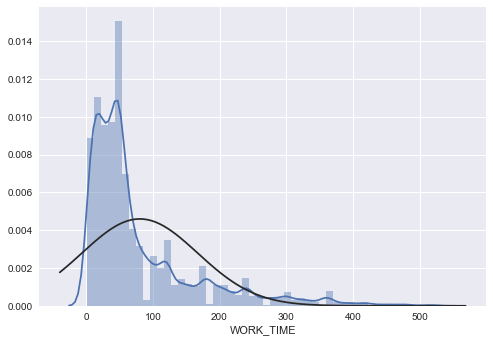

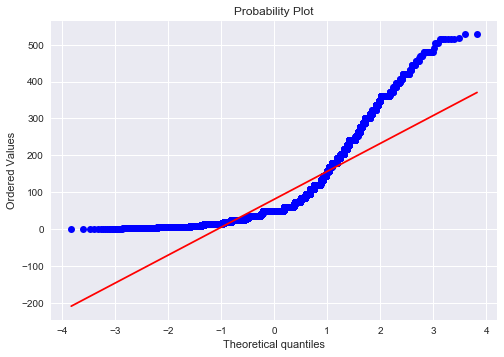

In [27]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn=0.7.1
import seaborn as sns

# импортируем norm и stats
from scipy.stats import norm
from scipy import stats

# строим гистограмму распределения и график
# квантиль-квантиль для переменной WORK_TIME
sns.distplot(train['WORK_TIME'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['WORK_TIME'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень, кубический корень, свернутый корень и логарифм. Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень (константа – x), кубический корень (константа – x) и логарифм (константа – x). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа.

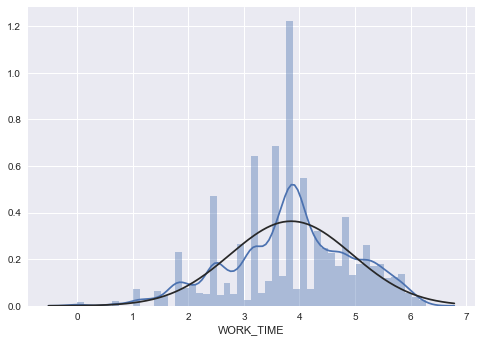

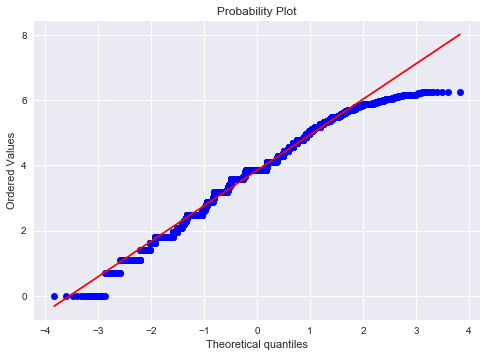

In [28]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной WORK_TIME,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['WORK_TIME']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['WORK_TIME']+a), plot=plt)

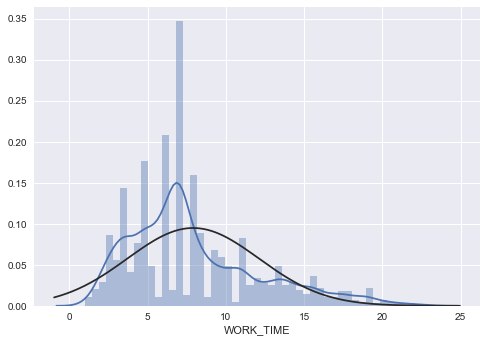

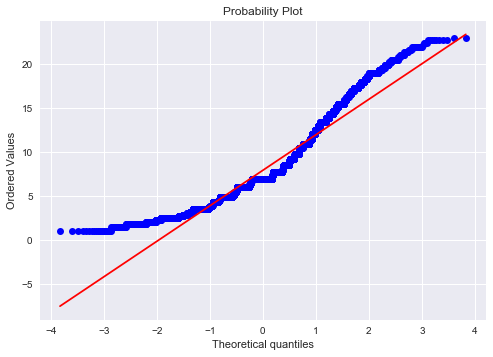

In [29]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной WORK_TIME,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['WORK_TIME']) * 
             (train['WORK_TIME'].abs()**(1/2)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['WORK_TIME']) * 
                     (train['WORK_TIME'].abs()**(1/2)), plot=plt)

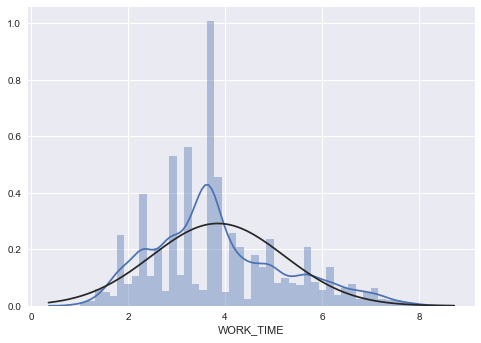

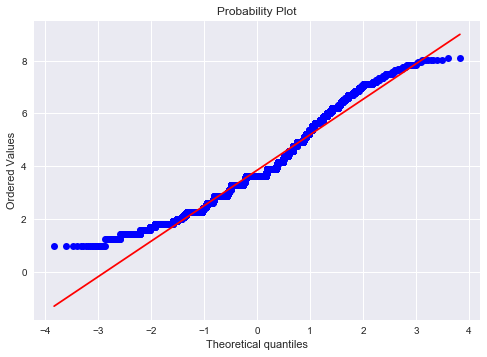

In [30]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной WORK_TIME,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['WORK_TIME']) * 
             (train['WORK_TIME'].abs()**(1/3)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['WORK_TIME']) * 
                     (train['WORK_TIME'].abs()**(1/3)), plot=plt)

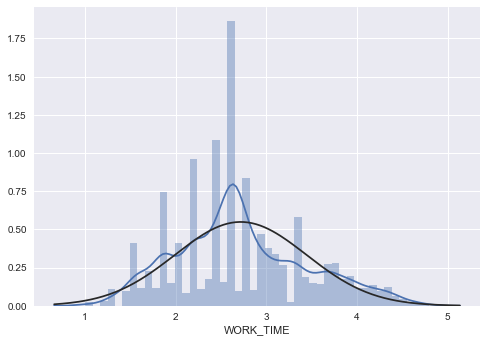

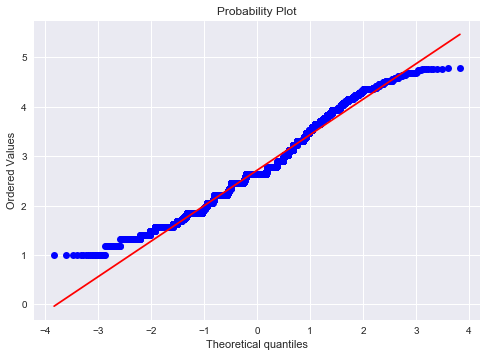

In [31]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной WORK_TIME,
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['WORK_TIME']) * np.sqrt(np.sqrt(train['WORK_TIME'].abs())), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['WORK_TIME']) * np.sqrt(np.sqrt(train['WORK_TIME'].abs())), plot=plt)

In [32]:
from scipy.stats import boxcox

# выполняем преобразование Бокса-Кокса
transformed, lam = boxcox(train['WORK_TIME'])

print('Lambda: %f' % lam)

Lambda: 0.098865


Преобразование Бокса-Кокса представляет собой целое семейство преобразований. 
При lambda = -1 выполняется обратное преобразование.
При lambda = -0.5 выполняется преобразование обратного квадратного корня.
При lambda = 0.0 выполняется логарифмическое преобразование.
При lambda = 0.5 выполняется преобразование квадратного корня.
При lambda = 1.0 преобразование не выполняется.

В данном случае наше значение 0.098865 близко к значению lambda=0, что практически эквивалентно логарифмическому преобразованию. Давайте построим гистограмму и график Q-Q для переменной, к которой было применено преобразование Бокса-Кокса.

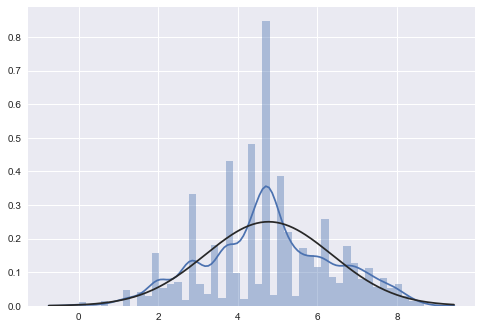

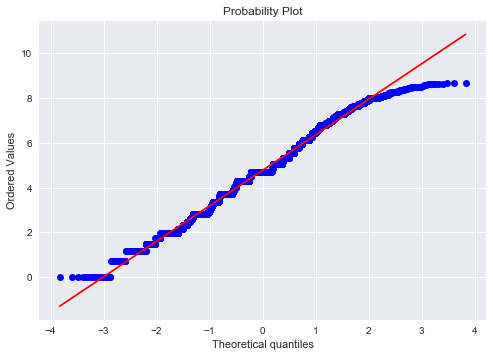

In [33]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной WORK_TIME,
# применив преобразование Бокса-Кокса
sns.distplot(transformed, fit=norm);
fig = plt.figure()
res = stats.probplot(transformed, plot=plt)

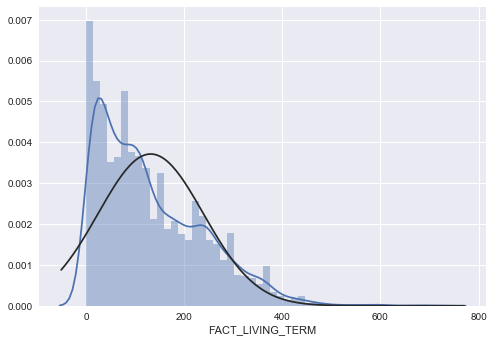

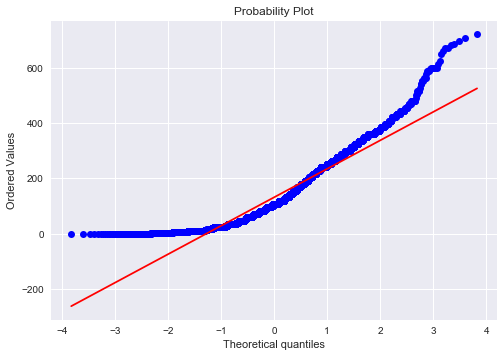

In [34]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной FACT_LIVING_TERM
sns.distplot(train['FACT_LIVING_TERM'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['FACT_LIVING_TERM'], plot=plt)

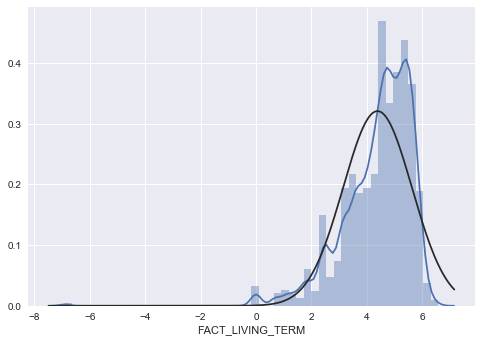

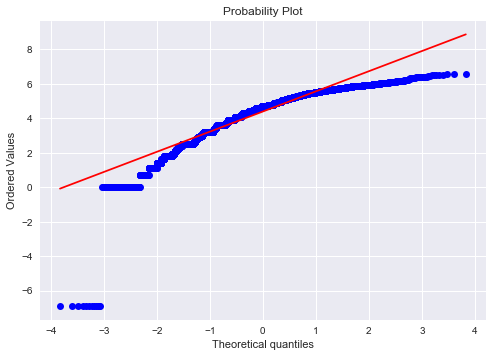

In [35]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной FACT_LIVING_TERM,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['FACT_LIVING_TERM']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['FACT_LIVING_TERM']+a), plot=plt)

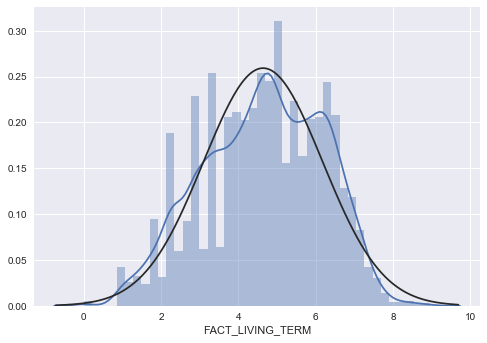

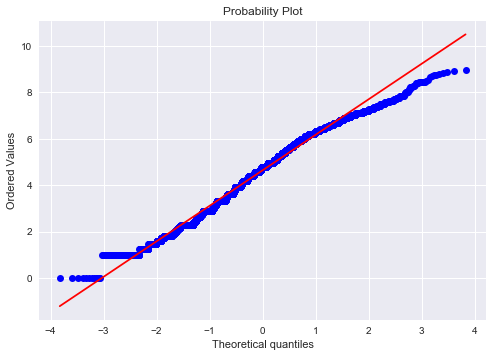

In [36]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной FACT_LIVING_TERM,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * 
             (train['FACT_LIVING_TERM'].abs()**(1/3)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * 
                     (train['FACT_LIVING_TERM'].abs()**(1/3)), plot=plt)

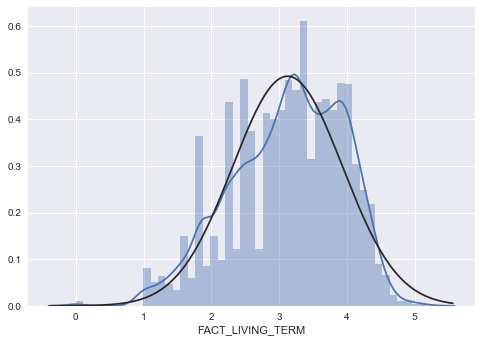

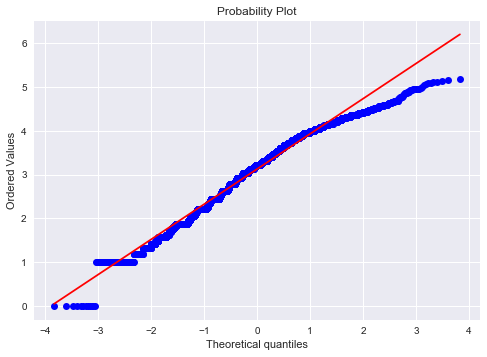

In [37]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной FACT_LIVING_TERM, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * np.sqrt(np.sqrt(train['FACT_LIVING_TERM'].abs())), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * np.sqrt(np.sqrt(train['FACT_LIVING_TERM'].abs())), plot=plt)

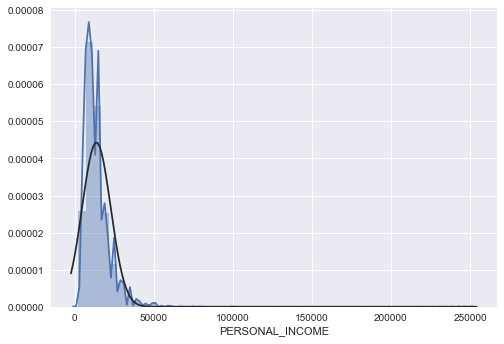

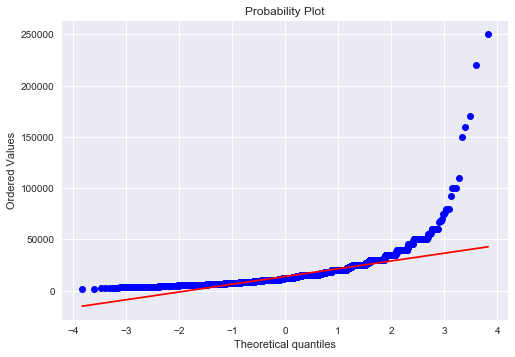

In [38]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной PERSONAL_INCOME
sns.distplot(train['PERSONAL_INCOME'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['PERSONAL_INCOME'], plot=plt)

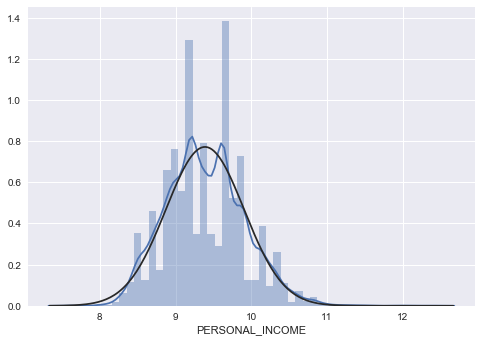

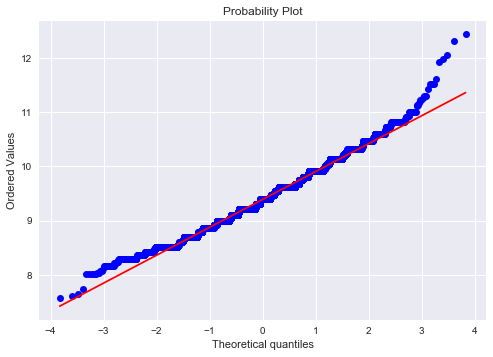

In [39]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной PERSONAL_INCOME,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['PERSONAL_INCOME']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['PERSONAL_INCOME']+a), plot=plt)

# Конструирование новых признаков, не использующее результаты математических вычислений (т.е. которое можно выполнять до/после разбиения на обучение/контроль)

In [40]:
# на основе переменной PERSONAL_INCOME создаем переменную 
# PERSONAL_INCOME_INT, у которой метки категории будут 
# повторять метки категорий FAMILY_INCOME
bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 
       'от 20000 до 50000 руб.', 'свыше 50000 руб.']
train['PERSONAL_INCOME_INT']=pd.cut(train['PERSONAL_INCOME'], bins, labels=lab)
test['PERSONAL_INCOME_INT']=pd.cut(test['PERSONAL_INCOME'], bins, labels=lab)

In [41]:
# выводим метки переменной PERSONAL_INCOME_INT
train['PERSONAL_INCOME_INT'].unique()

[от 10000 до 20000 руб., от 20000 до 50000 руб., от 5000 до 10000 руб., до 5000 руб., свыше 50000 руб.]
Categories (5, object): [до 5000 руб. < от 5000 до 10000 руб. < от 10000 до 20000 руб. < от 20000 до 50000 руб. < свыше 50000 руб.]

In [42]:
# создаем переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, если 
# категория переменной PERSONAL_FAMILY_INCOME совпадает с категорией 
# переменной FAMILY_INCOME, или 0 в противном случае, затем
# преобразовываем в тип object
train['PERSONAL_FAMILY_INCOME'] = np.where(train['PERSONAL_INCOME_INT']==train['FAMILY_INCOME'], 1, 0).astype('object')
test['PERSONAL_FAMILY_INCOME'] = np.where(test['PERSONAL_INCOME_INT']==test['FAMILY_INCOME'], 1, 0).astype('object')

# удаляем переменную PERSONAL_INCOME_INT
train.drop('PERSONAL_INCOME_INT', axis=1, inplace=True)
test.drop('PERSONAL_INCOME_INT', axis=1, inplace=True)

# Биннинг как один из способов конструирования новых признаков, использующий результаты математических вычислений (т.е. можно выполнять только после разбиения на обучение/контроль)

## Описание процедуры

Для количественных независимых переменных биннинг – это разбивка диапазона значений переменной на интервалы (бины). Например, есть переменная Возраст с диапазоном значений от 20 до 70 лет, можно разбить на интервалы: от 18 до 30 лет, от 31 года до 50 лет, от 51 года до 70 лет. В итоге получим категориальную переменную, в которой заданные нами интервалы являются категориями. Для категориальных независимых переменных биннинг – это переназначение (группировка) исходных категорий переменной. Например, есть переменная `Возраст` с категориями от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет, от 46 до 55 лет, от 56 до 65 лет. Категории можно укрупнить, из пяти категорий сделать три: от 18 до 35 лет, от 36 до 55 лет, 56 лет и старше. 

Основная причина проведения биннинга – это борьба с нелинейностью при построении скоринговых моделей на основе логистической регрессии. Часто взаимосвязь между непрерывной переменной и событием является нелинейной. Уравнение логистической регрессии, несмотря на то что ее выходное значение подвергается нелинейному преобразованию путем логита, все равно моделирует линейные зависимости между предикторами и зависимой переменной. 

Для иллюстрации можно взять пример с нелинейной зависимостью между возрастом и событием (например, откликом). Допустим, рассчитанный регрессионный коэффициент в уравнении логистической регрессии получился отрицательным. Это значит, что вероятность отклика с возрастом уменьшается. После проведенного биннинга, когда были выделены категории от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет и старше 45 лет, оказалось, что зависимость между возрастом и событием нелинейная. Первая (молодые) и последняя (старший возраст) категории склонны к отклику, а промежуточные сегменты, наоборот, не склонны к отклику.

Однако у биннинга имеются и серьезные недостатки. Авторитетный статистик Фрэнк Харрелл приводит ряд причин, по которым не следует проводить биннинг количественных независимых переменных. Основной недостаток – это потеря прогнозной силы переменной в силу снижение ее информативности (вспомним, что наиболее полную информацию несет количественная шкала). Кроме того, в основе биннинга лежит некорректное предположение о том, что зависимость между предиктором и откликом внутри интервалов является монотонной (по мнению Харрелла, это предположение еще менее разумно, чем предположение о линейности). При разбиении всего диапазона значений переменной на интервалы первый и последний интервалы будут очень широкими, потому что плотность распределения в них низкая. После биннинга для вычисления p-значений и доверительных интервалов необходимо использовать сложное имитационное моделирование, потому что переменная после биннинга распределена совершенно ненормально, особенно если для выбора границ диапазонов использовалось значение зависимой переменной, то есть, по сути, информация «из будущего». Нельзя не отметить и очевидный субъективизм категоризации, выражающийся в том, что если нескольким исследователям предложить категоризировать переменную, они выберут разные границы интервалов. 

В силу недостатков, изложенных ниже, биннинг как инструмент борьбы с нелинейностью используется все реже и уступает место преобразованиям на основе ограниченных кубических сплайнов, логарифма, корней второй и третьей степени. В то же время биннинг можно с успехом использовать для создания новых переменных, способных улучшить качество модели.

Самый простой вариант биннинга – разбить количественную переменную на определенное количество интервалов, заданных вручную. 

Обратите внимание, что как и в случае с импутацией статистиками, нельзя создать с помощью биннинга новую переменную на общем наборе данных, а потом разбить набор на обучение и контроль и работать с такой переменной в соответствующей выборке, как с обычной исторической переменной. Это обусловлено тем, что для биннинга используется информация о распределении значений переменной по всему набору данных. В результате получится, что в контрольной выборке мы будем использовать переменную, категории которой были получены, исходя из информации всего набора данных. Здесь важно понять, что с помощью биннинга мы на обучающей выборке получаем правила дискретизации (для количественных переменных) и правила перегруппировки (для категориальных переменных), которые применяются к соответствующей переменной в обучающей и контрольной выборках.

In [43]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной CREDITCAT
bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
# осуществляем биннинг переменной CREDIT и записываем
# результаты в новую переменную CREDITCAT
train['CREDITCAT'] = pd.cut(train['CREDIT'], bins)
test['CREDITCAT'] = pd.cut(test['CREDIT'], bins)

## Вычисление WoE и Information Value для оценки прогнозной силы переменных

Однако нам нужно создать не просто новую переменную, а переменную, обладающую высокой прогозной силой. Для задачи бинарной классификации эта прогнозная сила выражается в способности отличать отрицательный класс от положительного (проще говоря, отличать одну категорию зависимой переменной от другой). Поэтому при выполнении биннинга ориентируются на два показателя – WoE и IV, которые позволяют судить об этой способности. 
Давайте построим простую таблицу сопряженности между нашей новой переменной `CREDITCAT` и зависимой переменной `TARGET`.

In [44]:
# строим таблицу сопряженности CREDITCAT * TARGET
biv = pd.crosstab(train['CREDITCAT'], train['TARGET'])
biv

TARGET                 0    1
CREDITCAT                    
(-inf, 7292.0]      2852  326
(7292.0, 9427.0]     939  140
(9427.0, 14169.0]   1919  217
(14169.0, 27449.0]  2805  385
(27449.0, inf]       911  162

Исходя из этой таблицы, мы можем вычислить «вес» каждой категории. 
WoE (от weight of evidence) или вес категории вычисляется по формуле:

$WoE_i = ln(\frac{F_i^0}{F_i^1})$

где:
- _i_ – категория переменной;
- $ln$ – натуральный логарифм;
- $F_i^0$  –  относительная частота отрицательного класса (класса 0);
- $F_i^1$  –  относительная частота положительного класса (класса 1).

Вычислим вручную WoE для категории `(-inf, 7292.0]`. Относительная частота класса `0` в этой категории равна 2852/(2852+939+1919+2805+911) или 2852/9426=0.303. Относительная частота класса `1` равна 326/(326+140+217+385+162) или 326/1230=0.265. Отношение частот равно 0.303/0.265=1.143. Натуральный логарифм этого отношения ln(1.143)=0.13. WoE измеряет предсказательную силу каждой категории или сгруппированной категории с точки зрения способности отличать класс `0` от класса `1`. Положительные числа обозначают, что отдельно взятая категория выделяет большую пропорцию представителей класса `0`, чем представителей класса `1` (0.303 против 0.265).  Отрицательные числа обозначают, что отдельно взятая категория выделяет большую пропорцию представителей класса `1`, чем представителей класса `0`. 

При работе с WoE, нужно придерживаться нескольких правил:
- пропущенные значения группируются в отдельную категорию;
- каждая категория должна содержать не менее 5% наблюдений; 
- категории не должны содержать нулевого количества событий или не-событий.

WoE, как и процент «плохих», должны в достаточной мере отличаться по группам. Группировка выполняется так, чтобы максимизировать разницу между представителями класса `0` или представителями класса `1`. Одна из целей работы с WoE – выявить и отделить категории, которые хорошо дифференцируют клиентов. Категории со схожими значениями WoE объединяют, потому что такие категории содержат практически одинаковое количество представителей класса `0` и представителей класса `1` и демонстрируют одинаковое «поведение». Несмотря на то, что абсолютное значение WoE важно, разница между WoE групп играет ключевую роль. Чем больше разница между последующими категориями, тем выше прогнозная сила данной переменной.

В идеале WOE непропущенных значений должно быть монотонным, восходя от отрицательных значений к положительным или наоборот, без смены зависимости на обратную. 

Для проверки качества биннинга с помощью WoE строится график значений WoE. Также можно запустить логистическую регрессию с 1 независимой переменной со значениями WoE. Если тангенс угла наклона линии регрессии (попросту говоря, регрессионный коэффициент) не равен 1 или свободный член, определяющий точку пересечения линии регрессии с осью ординат, не равен ln (процент «хороших»/процент «плохих»), то биннинг выполнен некорректно.

Давайте вычислим WOE для каждой категории переменной `CREDITCAT`.

In [45]:
# вычисляем WoE для каждой категории переменной CREDITCAT, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
a= 0.0001
WoE = np.log((1.0*biv[0]/sum(biv[0])+a) / (1.0*biv[1]/sum(biv[1])+a))
WoE

CREDITCAT
(-inf, 7292.0]        0.132
(7292.0, 9427.0]     -0.133
(9427.0, 14169.0]     0.143
(14169.0, 27449.0]   -0.051
(27449.0, inf]       -0.309
dtype: float64

Итак, мы категоризировали переменную так, чтобы она максимально эффективно отличала один класс от другого, и могли бы ее подать на вход модели, но надо убедиться в том, насколько она будет полезна по сравнению с остальными переменными. Самый простой вариант - использовать IV (от information value) или информационное значение. Его можно вычислить для отдельной категории и для всей переменной. Информационное значение для категории вычисляется как разность между относительной частотой класса 0 и относительной частотой класса 1 в данной категории, умноженная на натуральный логарифм отношения этих частот.

$IV_i = {(F_i^0 - F_i^1)}{\ln(\frac{F_i^0}{F_i^1})}$

Вычислим вручную IV для категории `(-inf, 7292.0]`. Разность между относительными частотами равна 0.303-0.265=0.038. Информационное значение равно 0.038 x ln(1.143)= 0.038 x (0.13)=0.005. 
Давайте вычислим IV для каждой категории переменной `CREDITCAT`.

In [46]:
# вычисляем IV для каждой категории переменной CREDITCAT, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
IV_cat=((1.0*biv[0]/sum(biv[0])+a) - 
          (1.0*biv[1]/sum(biv[1])+a))*np.log((1.0*biv[0]/sum(biv[0])+a) 
                                                  / (1.0*biv[1]/sum(biv[1])+a))
IV_cat


CREDITCAT
(-inf, 7292.0]       0.005
(7292.0, 9427.0]     0.002
(9427.0, 14169.0]    0.004
(14169.0, 27449.0]   0.001
(27449.0, inf]       0.011
dtype: float64

Итоговое информационное значение используется для измерения прогнозной силы переменной в целом, для этого информационные значения, вычисленные по каждой категории, складываются.

$IV = \sum_{i = 1}^k(F_i^0 - F_i^1)ln(\frac{F_i^0}{F_i^1})$

Информационное значение всегда является положительной величиной. При интерпретации итоговых значений IV руководствуются правилом: 
- меньше 0.02 – характеристика не обладает предсказательной способностью;
- от 0.02 до 0.1 – слабая предсказательная способность;
- от 0.1 до 0.3 – средняя предсказательная способность;
- 0.3 и выше – высокая предсказательная способность. 
Значения IV более 0.5 обычно вызывают подозрения («слишком хорошо, чтобы быть правдой») и нуждаются в дополнительной проверке.

Давайте вычиcлим итоговое IV для переменной `CREDITCAT`.

In [47]:
# вычисляем итоговое IV для переменной CREDITCAT
IV = sum(((1.0*biv[0]/sum(biv[0])+a) - 
          (1.0*biv[1]/sum(biv[1])+a))*np.log((1.0*biv[0]/sum(biv[0])+a) 
                                                  / (1.0*biv[1]/sum(biv[1])+a)))
IV

0.02236784120809001

В данном случае переменная обладает слабой предсказательной способностью. А теперь давайте ее сравним с остальными переменными. Для этого напишем функцию, которая автоматически вычислит IV по всем переменным. 

In [48]:
# пишем функцию, вычисляющую IV
# по всем предикторам
def auto_IV(df): 
    iv_list = [] 
    a= 0.0001
    df_drop = df.drop("TARGET", axis=1) 
    for var_name in df_drop: 
        biv = pd.crosstab(df[var_name],df["TARGET"])        
        IV = sum(((1.0*biv[0]/sum(biv[0])+a) - (1.0*biv[1]/sum(biv[1])+a))*
                 np.log((1.0*biv[0]/sum(biv[0])+a) / (1.0*biv[1]/sum(biv[1])+a)))
        iv_list.append(IV)
    col_list =list(df_drop)
    results = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by = 'IV', ascending = False))  

In [49]:
# применяем нашу функцию к обучающему набору
auto_IV(train)

IV         Название переменной             Полезность
32 2.365                      CREDIT  Подозрительно высокая
34 0.867                 FST_PAYMENT  Подозрительно высокая
36 0.425            FACT_LIVING_TERM                Сильная
46 0.410            LOAN_AVG_DLQ_AMT                Сильная
47 0.377            LOAN_MAX_DLQ_AMT                Сильная
37 0.292                   WORK_TIME                Средняя
14 0.215             PERSONAL_INCOME                Средняя
0  0.192                         AGE                Средняя
17 0.151     POSTAL_ADDRESS_PROVINCE                Средняя
16 0.149       FACT_ADDRESS_PROVINCE                Средняя
15 0.146        REG_ADDRESS_PROVINCE                Средняя
8  0.140                GEN_INDUSTRY                Средняя
18 0.134                 TP_PROVINCE                Средняя
10 0.106                ORG_TP_STATE                Средняя
43 0.101               LOAN_NUM_PAYM                Средняя
9  0.101                   GEN_TITLE                Средняя
12 0.089                     JOB_DIR                 Слабая
11 0.082             ORG_TP_FCAPITAL                 Слабая
2  0.082           SOCSTATUS_PENS_FL                 Слабая
40 0.078                GEN_PHONE_FL                 Слабая
1  0.076           SOCSTATUS_WORK_FL                 Слабая
33 0.066                        TERM                 Слабая
19 0.054                   REGION_NM                 Слабая
42 0.053             LOAN_NUM_CLOSED                 Слабая
51 0.051      GENDER + FAMILY_INCOME                 Слабая
45 0.046                LOAN_MAX_DLQ                 Слабая
13 0.046               FAMILY_INCOME                 Слабая
44 0.046                LOAN_DLQ_NUM                 Слабая
48 0.039  PREVIOUS_CARD_NUM_UTILIZED                 Слабая
5  0.031                  DEPENDANTS                 Слабая
49 0.026                  FACT_TP_FL                 Слабая
24 0.024         REG_FACT_POST_TP_FL                 Слабая
7  0.023              MARITAL_STATUS                 Слабая
53 0.022                   CREDITCAT                 Слабая
6  0.022                   EDUCATION                 Слабая
22 0.022                 REG_POST_FL                 Слабая
20 0.018                 REG_FACT_FL            Бесполезная
23 0.018            REG_FACT_POST_FL            Бесполезная
52 0.018      PERSONAL_FAMILY_INCOME            Бесполезная
41 0.017              LOAN_NUM_TOTAL            Бесполезная
4  0.008                 CHILD_TOTAL            Бесполезная
3  0.008                      GENDER            Бесполезная
38 0.007               FACT_PHONE_FL            Бесполезная
30 0.005             GAR_PRESENCE_FL            Бесполезная
50 0.003                 AUTO_FOR_FL            Бесполезная
26 0.003                    OWN_AUTO            Бесполезная
35 0.002             GPF_DOCUMENT_FL            Бесполезная
25 0.001              FL_PRESENCE_FL            Бесполезная
29 0.001             COT_PRESENCE_FL            Бесполезная
39 0.001                REG_PHONE_FL            Бесполезная
27 0.001                 AUTO_RUS_FL            Бесполезная
31 0.001            LAND_PRESENCE_FL            Бесполезная
28 0.000              HS_PRESENCE_FL            Бесполезная
21 0.000                FACT_POST_FL            Бесполезная

Мы получаем информацию о наиболее полезных переменных, именно такие переменные имеет смысл подвергнуть биннингу и создать новые переменные. 
Давайте выполним биннинг переменных `FST_PAYMENT` и `AGE`.

Очень удобно делать биннинг с учетом WoE и IV с помощью обработчика **Конечные классы** бесплатной программы **Deductor Studio Academic**.

<img src='../img/Binning1.png'>

В нижеприведенном окне осуществляем биннинг, включив интерактивный режим (кнопка с изображением линейки-треугольника).

<img src='../img/Binning2.png'>



In [50]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной FSTPAYMENTCAT
bins = [-np.inf, 1500, 4995, np.inf]
# осуществляем биннинг переменной FST_PAYMENT и записываем
# результаты в новую переменную FSTPAYMENTCAT
train['FSTPAYMENTCAT'] = pd.cut(train['FST_PAYMENT'], bins)
test['FSTPAYMENTCAT'] = pd.cut(test['FST_PAYMENT'], bins)

In [51]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной AGECAT
bins = [-np.inf, 29, 43, 52, 57, np.inf]
# осуществляем биннинг переменной AGE и записываем
# результаты в новую переменную AGECAT
train['AGECAT'] = pd.cut(train['AGE'], bins)
test['AGECAT'] = pd.cut(test['AGE'], bins)

Очень часто выполняют фильтрацию переменных по итоговым значениям IV, то есть IV используется для удаления наиболее слабых переменных. Однако для отбора наиболее сильных переменных в модель логистической регрессии информационные значения использовать не стоит, потому что выбирать переменные нужно на основании того, как они работают вместе, а не на основании того, как они работают по отдельности. Кроме того, следует помнить, информационное значение зависит от объема категорий (по мере увеличения размеров категорий возрастает и информационное значение). Если WoE сохраняет монотонность как для небольших, так и для крупных категорий, выбирайте более крупные категории.

## Вычисление важностей случайного леса (на основе усредненного уменьшения неоднородности) для оценки прогнозной силы переменных

Для отбора наиболее сильных переменных можно воспользоваться важностями предикторов, вычисляемыми с помощью случайного леса. 
В основе расчета важности переменных лежит критерий уменьшения неоднородности в узлах-потомках дерева. 

В деревьях классификации оценивается уменьшение неоднородности распределения категорий зависимой переменной в узлах-потомках. Однородным узлом является узел, в котором все наблюдения относятся к одной и той же категории зависимой переменной, в то время как узел с максимальной неоднородностью содержит равное количество наблюдений во всех категориях зависимой переменной. Для расчета неоднородности в деревьях классификации используется уже знакомая мера Джини.

В деревьях регрессии оценивается уменьшение разброса значений зависимой переменной относительно определенного среднего значения в узлах-потомках. Здесь уже вместо меры Джини используется внутриузловая дисперсия. Если внутриузловую дисперсию трактовать с точки зрения неоднородности, то абсолютно однородным узлом является узел, в котором все наблюдения имеют одинаковые значения зависимой переменной, в то время как узлом с высоким значением неоднородности (в случае количественной зависимой переменной ограничения максимально возможного значения неоднородности не существует) является узел, включающий наблюдения с сильно различающимися значениями зависимой переменной.

Алгоритм вычисления важности предиктора на основе усредненного уменьшения неоднородности выглядит так:

<dd>1. Для каждого дерева случайного леса вычисляем сумму улучшений или уменьшений неоднородности узлов на всех ветвлениях, связанных с данным предиктором. На рисунке показан пример вычисления улучшения.</dd>


<img src='../img/Improvement.png'>


<dd>2. Итоговую сумму уменьшений неоднородности, полученную по всем деревьям, усредняем путем деления на общее количество деревьев.</dd>

<dd>3. Вышеописанные шаги повторяем для всех остальных предикторов.<dd>

Наиболее важный предиктор – тот, который дает наибольшее усредненное уменьшение неоднородности (для деревьев классификации – уменьшение меры Джини, для деревьев регрессии – уменьшение суммы квадратов остатков). Нетрудно увидеть и недостаток подхода. По сути важность складывается из частоты использования переменной в качестве предиктора разбиения, то есть чаще наиболее важными будут переменные, по которым можем быть рассмотрено больше вариантов разбиения и у них больше шансов стать предиктором разбиения. Поэтому наиболее важными переменными чаще будут переменные с большим количеством уникальных значений, традиционно это количественные переменные. 

In [52]:
# выполняем дамми-кодирование
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'AGECAT_(57.0, inf]']
X_test = test_dummies.loc[:, 'AGE':'AGECAT_(57.0, inf]']
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=50, random_state=152, n_jobs=-1)
# подгоняем модель
forest.fit(X_train, y_train)
# cоздаем объект с названиями предикторов
feat_labels = X_train.columns
# cоздаем объект со значениями важностей, вычисленными 
# моделью forest (обратите внимание, речь идет о 
# важностях на основе усредненного уменьшения
# неоднородности)
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем 
# названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 55,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) CREDIT                                                  0.034740
 2) FST_PAYMENT                                             0.031713
 3) FACT_LIVING_TERM                                        0.031210
 4) PERSONAL_INCOME                                         0.030592
 5) WORK_TIME                                               0.030450
 6) AGE                                                     0.028839
 7) LOAN_NUM_PAYM                                           0.022835
 8) TERM                                                    0.020317
 9) CHILD_TOTAL                                             0.016326
10) DEPENDANTS                                              0.014049
11) LOAN_NUM_CLOSED                                         0.011537
12) LOAN_MAX_DLQ_AMT                                        0.010486
13) LOAN_AVG_DLQ_AMT                                        0.010059
14) MARITAL_STATUS_Состою в браке                           0.007340
15) EDUCATION_Среднее специальное 

Если с количественными переменными все более или менее понятно, о важности категориальных переменных, "расплавленных" на бинарные признаки, судить труднее. Чаще всего в качестве наиболее важных следует рассматривать те категориальные переменные, которые находятся в верхних строчках списка (оптимально смотреть важности случайного леса, построенного в H2O). Давайте укрупним переменную `GEN_TITLE`, на основе укрупнения категорий переменной `REGION_NM` создадим переменную `REGIONCAT`, на основе укрупнения категорий переменной `ORG_TP_STATE` создадим переменную `ORGCAT`.

In [53]:
# укрупняем категории переменной GEN_TITLE
for i in train.index:
    if train.GEN_TITLE[i] in ['Рабочий','Служащий','Работник сферы услуг',                             
                             'Другое', 'Индивидуальный предприниматель',
                             'Руководитель низшего звена']:
        train.set_value(i,'GEN_TITLE',1)
    elif train.GEN_TITLE[i] in ['Специалист','Руководитель среднего звена']:
        train.set_value(i,'GEN_TITLE',2)
    elif train.GEN_TITLE[i] == 'Не указано':
        train.set_value(i,'GEN_TITLE',3)
    elif train.GEN_TITLE[i] in ['Высококвалифиц. специалист', 'Руководитель высшего звена']:
        train.set_value(i,'GEN_TITLE',4)
        
for i in test.index:
    if test.GEN_TITLE[i] in ['Рабочий','Служащий','Работник сферы услуг', 
                             'Другое', 'Индивидуальный предприниматель',
                             'Руководитель низшего звена']:
        test.set_value(i,'GEN_TITLE',1)
    elif test.GEN_TITLE[i] in ['Специалист','Руководитель среднего звена']:
        test.set_value(i,'GEN_TITLE',2)
    elif test.GEN_TITLE[i] == 'Не указано':
        test.set_value(i,'GEN_TITLE',3)
    elif test.GEN_TITLE[i] in ['Высококвалифиц. специалист', 'Руководитель высшего звена']:
        test.set_value(i,'GEN_TITLE',4)

# задаем для переменной GEN_TITLE тип object 
train['GEN_TITLE']=train['GEN_TITLE'].astype('object')
test['GEN_TITLE']=test['GEN_TITLE'].astype('object')

In [54]:
# на основе укрупнения категорий переменной REGION_NM 
# создадим переменную REGIONCAT
for i in train.index:
    if train.REGION_NM[i] in ['ЮЖНЫЙ','ЦЕНТРАЛЬНЫЙ 1','ЦЕНТРАЛЬНЫЙ 2']:
        train.set_value(i,'REGIONCAT',1)
    elif train.REGION_NM[i] in ['ЗАПАДНО-СИБИРСКИЙ','ВОСТОЧНО-СИБИРСКИЙ','УРАЛЬСКИЙ',
                             'ДАЛЬНЕВОСТОЧНЫЙ','СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС']:
        train.set_value(i,'REGIONCAT',2)
    elif train.REGION_NM[i] == 'ПРИВОЛЖСКИЙ':
        train.set_value(i,'REGIONCAT',3)
        
for i in test.index:
    if test.REGION_NM[i] in ['ЮЖНЫЙ','ЦЕНТРАЛЬНЫЙ 1','ЦЕНТРАЛЬНЫЙ 2']:
        test.set_value(i,'REGIONCAT',1)
    elif test.REGION_NM[i] in ['ЗАПАДНО-СИБИРСКИЙ','ВОСТОЧНО-СИБИРСКИЙ','УРАЛЬСКИЙ',
                             'ДАЛЬНЕВОСТОЧНЫЙ','СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС']:
        test.set_value(i,'REGIONCAT',2)
    elif test.REGION_NM[i] == 'ПРИВОЛЖСКИЙ':
        test.set_value(i,'REGIONCAT',3)

# задаем для переменной REGIONCAT тип object 
train['REGIONCAT']=train['REGIONCAT'].astype('object')
test['REGIONCAT']=test['REGIONCAT'].astype('object')

In [55]:
# на основе укрупнения категорий переменной ORG_TP_STATE создаем переменную ORGCAT
for i in train.index:
    if train.ORG_TP_STATE[i] in ['Частная компания','Индивидуальный предприниматель','Некоммерческая организация']:
        train.set_value(i,'ORGCAT',1)
    elif train.ORG_TP_STATE[i] in ['Не указано']:
        train.set_value(i,'ORGCAT',2)
    elif train.ORG_TP_STATE[i] == 'Государственная комп./учреж.':
        train.set_value(i,'ORGCAT',3)
        
for i in test.index:
    if test.ORG_TP_STATE[i] in ['Частная компания','Индивидуальный предприниматель','Некоммерческая организация']:
        test.set_value(i,'ORGCAT',1)
    elif test.ORG_TP_STATE[i] in ['Не указано']:
        test.set_value(i,'ORGCAT',2)
    elif test.ORG_TP_STATE[i] == 'Государственная комп./учреж.':
        test.set_value(i,'ORGCAT',3)

# задаем для переменной ORGCAT тип object 
train['ORGCAT']=train['ORGCAT'].astype('object')
test['ORGCAT']=test['ORGCAT'].astype('object')

# Выполнение преобразований, исходя из информации гистограмм распределения и графиков квантиль-квантиль

In [56]:
# выполняем логарифмическое преобразование
# переменной PERSONAL_INCOME
train['PERSONAL_INCOME']=np.log(train['PERSONAL_INCOME']+0.01)
test['PERSONAL_INCOME']=np.log(test['PERSONAL_INCOME']+0.01)

# выполняем логарифмическое преобразование
# переменной CREDIT
train['CREDIT']=np.log(train['CREDIT']+0.01)
test['CREDIT']=np.log(test['CREDIT']+0.01)

# выполняем логарифмическое преобразование
# переменной FACT_LIVING_TERM
train['WORK_TIME']=np.log(train['WORK_TIME']+0.01)
test['WORK_TIME']=np.log(test['WORK_TIME']+0.01)

# выполняем преобразование переменной WORK_TIME
# кубическим корнем
train['FACT_LIVING_TERM']=np.sign(train['FACT_LIVING_TERM']) * (train['FACT_LIVING_TERM'].abs()**(1/3))
test['FACT_LIVING_TERM']=np.sign(test['FACT_LIVING_TERM']) * (test['FACT_LIVING_TERM'].abs()**(1/3))

# выполняем логарифмическое преобразование 
# переменной LOAN_AVG_DLQ_AMT
train['LOAN_AVG_DLQ_AMT']=np.log(train['LOAN_AVG_DLQ_AMT']+0.01)
test['LOAN_AVG_DLQ_AMT']=np.log(test['LOAN_AVG_DLQ_AMT']+0.01)

# Конструирование новых признаков, не использующее результаты математических вычислений (т.е. которое можно выполнять до/после разбиения на обучение/контроль)

In [57]:
# создаем переменную CHILD_DEPENDANTS
train['CHILD_DEPENDANTS'] = train['CHILD_TOTAL']/(train['CHILD_TOTAL']+train['DEPENDANTS'])
test['CHILD_DEPENDANTS'] = test['CHILD_TOTAL']/(test['CHILD_TOTAL']+test['DEPENDANTS'])

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['CHILD_DEPENDANTS']=np.where(train['CHILD_DEPENDANTS'].isnull(), 0, train['CHILD_DEPENDANTS'])
test['CHILD_DEPENDANTS']=np.where(test['CHILD_DEPENDANTS'].isnull(), 0, test['CHILD_DEPENDANTS'])

# если бы наша переменная содержала бесконечные значения, то можно было бы воспользоваться
# train['CHILD_DEPENDANTS']=np.where(np.isfinite(train['CHILD_DEPENDANTS']), train['CHILD_DEPENDANTS'], 0)  
# т.е. если переменная CHILD_DEPENDANTS содержит конечное значение, 
# возвращаем исходное значение, если она содержит бесконечное
# значение, возвращаем значение 0

# создаем переменную PAYMENT - сумму ежемесячного взноса
# по кредиту, разделив сумму кредита (CREDIT)
# на срок кредита (TERM)
train['PAYMENT']=np.log((train['CREDIT']/train['TERM'])+0.01)
test['PAYMENT']=np.log((test['CREDIT']/test['TERM'])+0.01)

# создаем переменную PTI - коэффициент долговой нагрузки, 
# разделив сумму ежемесячного взноса по кредиту (PAYMENT)
# на личный доход (PERSONAL_INCOME)
train['PTI'] = train['PAYMENT']/train['PERSONAL_INCOME']
test['PTI'] = test['PAYMENT']/test['PERSONAL_INCOME']

# создаем переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, 
# разделив количество погашенных ссуд (LOAN_NUM_CLOSED)
# на общее количество ссуд (LOAN_NUM_TOTAL)
train['CLOSED_TO_TOTAL'] = train['LOAN_NUM_CLOSED']/train['LOAN_NUM_TOTAL']
test['CLOSED_TO_TOTAL'] = test['LOAN_NUM_CLOSED']/test['LOAN_NUM_TOTAL']

# создаем переменную PAYM_TO_LOAN– отношение количества 
# платежей (LOAN_NUM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
train['PAYM_TO_LOAN'] = train['LOAN_NUM_PAYM']/train['LOAN_NUM_TOTAL']
test['PAYM_TO_LOAN'] = test['LOAN_NUM_PAYM']/test['LOAN_NUM_TOTAL']

# создаем переменную DLQ_TO_PAYM – отношение количества просрочек 
# (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
train['DLQ_TO_PAYM'] = train['LOAN_DLQ_NUM']/train['LOAN_NUM_PAYM']
test['DLQ_TO_PAYM'] = test['LOAN_DLQ_NUM']/test['LOAN_NUM_PAYM']

train['FST_SHARE'] = train['FST_PAYMENT']/(train['FST_PAYMENT']+train['CREDIT'])
test['FST_SHARE'] = test['FST_PAYMENT']/(test['FST_PAYMENT']+test['CREDIT'])
                         
train['DLQ_TIME'] = train['LOAN_MAX_DLQ']/train['LOAN_DLQ_NUM']
test['DLQ_TIME'] = test['LOAN_MAX_DLQ']/test['LOAN_DLQ_NUM']
                     
train['DLQ_TIME'] = np.where(train['DLQ_TIME'].isnull(), 0, train['DLQ_TIME'])
test['DLQ_TIME'] = np.where(test['DLQ_TIME'].isnull(), 0, test['DLQ_TIME'])
                        
train['LOAN_MAX_DLQ_RANGE']=((train['LOAN_MAX_DLQ_AMT']-train['LOAN_AVG_DLQ_AMT'])/train['LOAN_AVG_DLQ_AMT']).abs()
test['LOAN_MAX_DLQ_RANGE']=((test['LOAN_MAX_DLQ_AMT']-test['LOAN_AVG_DLQ_AMT'])/test['LOAN_AVG_DLQ_AMT']).abs()

train['LOAN_MAX_DLQ_RANGE'] = np.where(train['LOAN_MAX_DLQ_RANGE'].isnull(), 0, train['LOAN_MAX_DLQ_RANGE'])
test['LOAN_MAX_DLQ_RANGE'] = np.where(test['LOAN_MAX_DLQ_RANGE'].isnull(), 0, test['LOAN_MAX_DLQ_RANGE'])
              
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 14692 to 6374
Data columns (total 68 columns):
TARGET                        10656 non-null object
AGE                           10656 non-null int64
SOCSTATUS_WORK_FL             10656 non-null object
SOCSTATUS_PENS_FL             10656 non-null object
GENDER                        10656 non-null object
CHILD_TOTAL                   10656 non-null int64
DEPENDANTS                    10656 non-null int64
EDUCATION                     10656 non-null object
MARITAL_STATUS                10656 non-null object
GEN_INDUSTRY                  10656 non-null object
GEN_TITLE                     10656 non-null object
ORG_TP_STATE                  10656 non-null object
ORG_TP_FCAPITAL               10656 non-null object
JOB_DIR                       10656 non-null object
FAMILY_INCOME                 10656 non-null object
PERSONAL_INCOME               10656 non-null float64
REG_ADDRESS_PROVINCE          10656 non-null object
FACT_A

# Дамми-кодирование

In [58]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'FACT_TP_FL', 'AUTO_FOR_FL', 'GENDER + FAMILY_INCOME', 'PERSONAL_FAMILY_INCOME', 'CREDITCAT', 'FSTPAYMENTCAT', 'AGECAT', 'REGIONCAT',

Переменные после get_dummies:
 ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'OWN_AUTO', 'CREDIT', 'TERM', 'FST_PAYMENT', 'FACT_LIVING_TERM', 'WORK_TIME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'CHILD_DEPENDANTS', 'PAYMENT', 'PTI', 'CLOSED_TO_TOTAL', 'PAYM_TO_LOAN', 'DLQ_TO_PAYM', 'FST_SHARE', 'DLQ_TIME', 'LOAN_MAX_DLQ_RANGE', 'TARGET_0', 'TARGET_1', 'SOCSTATUS_WORK_FL_0', 'SOCSTATUS_WORK_FL_1', 'SOCSTATUS_PENS_FL_0', 'SOCSTATUS_PENS_FL_1', 'GENDER_0', 'GENDER_1', 'EDUCATION_Высшее', 'EDUCATION_Неоконченное высшее', 'EDUCATION_Неполное среднее', 'EDUCATION_Среднее', 'EDUCATION_Среднее специальное', 'MARITAL_STATUS_Вдовец/Вдова', 'MARITAL_STATUS_Гражданский брак', 'MARITAL_STATUS_Не состоял в браке', 'MARITAL_STATUS_Разведен(а)', 'MARITAL_STATUS_Состою в браке', 'GEN_INDUSTRY_Банк/Финансы', 'GEN_INDUSTRY_Государственная служба', 'GEN_INDUSTRY_Другие сферы', 'GEN

# Подготовка массивов признаков и массивов меток зависимой переменной

In [59]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'ORGCAT_3.0']
X_test = test_dummies.loc[:, 'AGE':'ORGCAT_3.0']

# Построение логистической регрессии

## Стандартизация (приведение шкал всех переменных к одному масштабу)

Помимо нормальности распределения еще одной важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

В итоге мы получаем распределение со средним 0 и стандартным отклонением 1. Именно это и делает класс `StandardScaler`.
Сначала импортируем класс `StandardScaler`, который осуществляет предварительную обработку, а затем создаем его экземпляр.

In [60]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создаем экземпляр класса StandardScaler
scaler = StandardScaler()

Затем с помощью метода `fit` мы подгоняем `scaler` на обучающих данных. В отличие от обычных моделей машинного обучения, при вызове метода `fit` `scaler` работает с данными (`X_train`), а ответы (`y_train`) не используются.

In [61]:
# подгоняем модель
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Чтобы применить преобразование, которое мы только что подогнали, то есть фактически отмасштабировать (scale) обучающие и контрольные данные, мы воспользуемся методом `transform`. Метод `transform` используется в `scikit-learn`, когда модель возвращает новое представление данных. Обратите внимамние, мы всегда применяем одинаковое преобразование к обучающему и тестовому наборам. Это означает, что метод `transform` всегда вычитает среднее значение, вычисленное для обучающего набора, и делит на стандартное отклонение, вычисленное также для обучающего набора. Среднее значение и стандартное отклонение переменной для обучающего набора могут отличаться от среднего значения и стандартного отклонения переменной для тестового набора.

In [62]:
# преобразовываем данные и по отмасштабированным данным
# уже можно будет строить логистическую регрессию
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение модели логистической регрессии

In [63]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression

### `Параметры класса LogisticRegression`

- **`penalty`** – задает тип регуляризации. Значение `l1` соответствует l1-регуляризации (лассо), значение `l2` соответствует l2-регуляризации (гребневой регрессии). Оптимизаторы `newton-cg`, `sag` и `lbfgs` поддерживают только `l2`. По умолчанию используется значение `l2`;
- **`C`** – задает силу регуляризации (чем больше значение, тем меньше сила регуляризации). По умолчанию используется значение `1`;
- **`tol`** – задает допуск сходимости. По умолчанию используется значение 1e-4;
- **`solver`** – задает оптимизатор. Возможные значения: `newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`. По умолчанию используется значение `liblinear`. При работе с небольшими наборами данными хорошим выбором может быть значение `liblinear`, тогда как при работе с большими наборами данных более быстрыми будут `sag` и `saga`. Оптимизаторы `newton-cg`, `lbfgs` и `sag` работают только с l2-регуляризацией, тогда как `liblinear` и `saga` работают только с l1-регуляризацией;
- **`max_iter`** – задает максимальное количество итераций для оптимизации. По умолчанию используется значение 100;
- **`class_weight`** – задает веса классов, например, `{0:0.67, 1:0.33}`. По умолчанию все классы имеют вес 1.

In [64]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# строим логистическую регрессию на данных,
# отмасштабированных с помощью StandardScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.751
AUC на контрольной выборке: 0.684


## Другие виды стандартизации

`StandardScaler` хорошо работает, когда данные подчиняются нормальному распределению. 
Теперь воспользуемся классом `MinMaxScaler`. Из каждого значения переменной мы вычитаем минимальное значение и полученный результат делим на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Этот способ работает лучше в тех случаях, когда `StandardScaler` дает не очень хороший результат. Если распределение не является нормальным или стандартное отклонение является очень маленьким, `MinMaxScaler` сработает лучше.

In [65]:
# применяем MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

# строим модель логистической регрессии на данных,
# отмасштабированных с помощью MinMaxScaler
logreg = LogisticRegression().fit(X_train_scaled2, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled2)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled2)[:, 1])))

AUC на обучающей выборке: 0.746
AUC на контрольной выборке: 0.689


Однако обратите внимание, что `MinMaxScaler` чувствителен к выбросам, поэтому если данные содержат выбросы, класс `RobustScaler` может дать лучший результат.
Класс `RobustScaler` похож на класс `MinMaxScaler`, но вместо ширины диапазона использует межквартильный размах и поэтому устойчив к выбросам. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [66]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler3 = RobustScaler()
scaler3.fit(X_train)
X_train_scaled3 = scaler3.transform(X_train)
X_test_scaled3 = scaler3.transform(X_test)

# строим модель логистической регрессии на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled3, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled3)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.746
AUC на контрольной выборке: 0.691


## Проблема дисбаланса классов
Нередко возникают ситуации, когда в обучающем наборе данных доля примеров некоторого класса слишком мала (этот класс будем называть миноритарным, а другой, сильно представленный, — мажоритарным). Такие тенденции хорошо заметны в кредитном скоринге, в медицине, в директ-маркетинге. Качество такого классификатора может оказаться невысоким.

Кроме того, нужно учитывать стоимости ошибочной классификации. Часто неверная классификация примеров миноритарного класса (например, "плохих" заемщиков), как правило, обходится в разы дороже, чем ошибочная классификация примера мажоритарного класса.

Давайте взглянем на распределение классов зависимой переменной в обучающей выборке.

In [67]:
# смотрим распределение классов зависимой 
# переменной в обучающей выборке (проценты)
print(y_train.value_counts(normalize=True))

0   0.885
1   0.115
Name: TARGET_1, dtype: float64


In [68]:
# смотрим распределение классов зависимой 
# переменной в обучающей выборке (частоты)
print(y_train.value_counts())

0    9426
1    1230
Name: TARGET_1, dtype: int64


Самая простая стратегия - увеличить вес миноритарного класса.

In [69]:
best_score = 0

for class_weight in ['balanced', {0:0.70, 1:0.30}, {0:0.75, 1:0.25}, 
                     {0:0.80, 1:0.20}, {0:0.85, 1:0.15}]:
    # для каждой комбинации параметров обучаем логистическую регрессию
    logreg = LogisticRegression(class_weight=class_weight).fit(X_train_scaled3, y_train)
    logreg.fit(X_train_scaled3, y_train)
    # оцениваем качество логистической регрессии на контрольной выборке
    auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])
    # если получаем наилучшее значение AUC, сохраняем значение и параметры
    if auc_score > best_score:
        best_score = auc_score
        best_parameters = {'class_weight': class_weight}

print("Наилучшее значение AUC: {:.3f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Наилучшее значение AUC: 0.692
Наилучшие значения параметров: {'class_weight': {0: 0.75, 1: 0.25}}


Восстановление баланса классов может проходить двумя путями. В первом случае удаляют некоторое количество примеров мажоритарного класса (undersampling), во втором – увеличивают количество примеров миноритарного (oversampling). В свою очередь стратегии undersampling/oversampling подразделяют на две группы: случайные и специальные.

Все эти техники сэмплирования (как over, так и under, а также их комбинации) можно осуществить с помощью библиотеки `imbalanced-learn`.

### Удаление примеров мажоритарного класса
#### Случайное удаление примеров мажоритарного класса (Random Undersampling)

Для этого рассчитывается K - количество мажоритарных примеров, которое необходимо удалить для достижения требуемого уровня соотношения различных классов. Затем случайным образом выбираются K мажоритарных примеров и удаляются. Давайте попробуем применить эту стратегию с помощью класса `RandomUnderSampler` библиотеки `imbalanced-learn`.

In [70]:
# импортируем класс RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

#### `Параметры класса RandomUnderSampler`

- **`ratio`** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Например, если задать `ratio={0:9000, 1:1230}`, то применительно к нашему случаю мы оставляем все примеры миноритарного класса (1230), а из исходных 9426 наблюдений мажоритарного класса удаляем 426 наблюдений, оставив 9000 наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов. Однако наилучшее качество обычно дает тонкая настройка с помощью словаря;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости.

In [71]:
# создаем класс RandomUnderSampler, мы случайно удалим
# 426 наблюдений мажоритарного класса
rus = RandomUnderSampler(ratio={0:9000, 1:1230}, random_state=42)
# подгоняем модель RandomUnderSampler и выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = rus.fit_sample(X_train_scaled3, y_train)
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.747
AUC на контрольной выборке: 0.690


In [72]:
# создаем класс RandomUnderSampler, мы выполним
# случайный семплинг мажоритарного класса
rus = RandomUnderSampler(ratio="majority", random_state=42)
# подгоняем модель RandomUnderSampler и выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = rus.fit_sample(X_train_scaled3, y_train)
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.776
AUC на контрольной выборке: 0.672


Примеры из мажоритарного класса могут удаляться не только случайным образом, но и по определенным правилам. Одной из таких стратегий являются связи Томека.

#### Связи Томека


Пусть примеры $E_i$ и $E_j$ принадлежат к различным классам, $d(E_i,E_j)$ – расстояние между указанными примерами. Пара $(E_i,E_j)$ называется связью Томека, если не найдется ни одного примера $E_l$ такого, что будет справедлива совокупность неравенств:

$d(E_i,E_l)<d(E_i,E_j)$ и $d(E_j,E_l)<d(E_i,E_j)$

Согласно данному подходу, все мажоритарные записи, входящие в связи Томека, должны быть удалены из набора данных. Этот способ хорошо удаляет записи, которые можно рассматривать в качестве «зашумляющих». Давайте попробуем применить эту стратегию с помощью класса `TomekLinks` библиотеки `imbalanced-learn`.

In [73]:
from imblearn.under_sampling import TomekLinks

#### `Параметры класса TomekLinks`

- **`ratio`** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости;
- **`n_jobs`** – задает количество ядер процессора (по умолчанию значение `1`).

In [74]:
# создаем класс TomekLinks, мы выполним
# случайный семплинг мажоритарного класса
tomek = TomekLinks(ratio="majority", random_state=42, n_jobs=-1)
# подгоняем модель TomekLinks и выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = tomek.fit_sample(X_train_scaled3, y_train)
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.752
AUC на контрольной выборке: 0.691


### Увеличение числа примеров миноритарного класса

#### Случайное дублирование примеров миноритарного класса (Random Oversampling)

Самый простой метод – это случайное дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо, выбирается количество случайных записей для дублирования. Давайте попробуем применить эту стратегию с помощью класса `RandomOverSampler` библиотеки `imbalanced-learn`.

In [75]:
# импортируем класс RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

#### `Параметры класса RandomOverSampler`

- **`ratio`** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Например, если задать `ratio={0:9426, 1:1300}`, то применительно к нашему случаю мы оставляем все примеры мажоритарного класса (9426), а из исходных 1230 наблюдений миноритарного класса создаем 1300 наблюдений путем дублирования. Значение `minority` выполняет семплинг миноритарного класса. Значение `all` выполняет семплинг всех классов. Однако наилучшее качество обычно дает тонкая настройка с помощью словаря;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости.

In [76]:
# создаем класс RandomOverSampler, мы случайно продублируем
# наблюдения миноритарного класса
ros = RandomOverSampler(ratio={0:9426, 1:1300}, random_state=42)
# подгоняем модель RandomOverSampler и выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = ros.fit_sample(X_train_scaled3, y_train)
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.748
AUC на контрольной выборке: 0.689


#### SMOTE

SMOTE (Syntetic Minority Oversampling Technique – оверсемплинг за счет создания синтетических примеров миноритарного класса) генерирует синтетические примеры миноритарного класса, чтобы увеличить долю миноритарного класса в выборке. Для каждого примера миноритарного класса мы вычисляем его $k$ ближайших соседей (обычно $k$=5) и затем из них случайным образом выбираем некоторые примеры в соответствии с нашим уровнем оверсемплинга. После этого вдоль линий, соединяющих пример миноритарного класса с его выбранными ближайшими соседями генерируются новые синтетические примеры. 

<img src='../img/SMOTE.png'>


В отличие от случайного оверсамплинга, реализованного в классическом SMOTE, модифицированный SMOTE (borderline-SMOTE1 и borderline-SMOTE2) выполняет отбор и усиление пограничных примеров миноритарного класса (примеров миноритарного класса, расположенных на границе принятия решений). Сначала мы находим пограничные примеры миноритарного класса, затем генерируем из них синтетические примеры и затем добавляем в исходную обучающую выборку. 

Пусть весь обучающий набор – это $T$, миноритарный класс – $P$, а мажоритарный класс – $N$ и тогда

$P=(p_1,p_2,…,p_l), N=(n_1,n_2,…,n_g)$

где $l$ и $g$ – это количество примеров миноритарного и мажоритарного классов. 

Тогда детальная процедура borderline-SMOTE1 выглядит следующим образом:

Этап 1. Для каждого примера  $p_i(i=1,2,…,p_l)$ в миноритарном классе $P$ мы вычисляем $m$ ближайших соседей из всей обучающей выборки $T$. Количество примеров мажоритарного классов, попавших в $m$ ближайших соседей, помечается как $m' (0\leq m'\leq m)$.

Этап 2. Если $m'=m$, т.е. все $m$ ближайших соседей примера  $p_i$ являются примерами мажоритарного класса, пример $p_i$ рассматривается как зашумленный и в дальнейших этапах не участвует. Если $m/2\leq m'< m$, т.е. если для примера $p_i$ среди его ближайших соседей больше половины – это примеры мажоритарного класса, то пример $p_i$ рассматривается как пример, имеющий риск неправильной классификации, и попадает в набор под названием $DANGER$ («опасная зона»). Если $0 \leq m'< m/2$, т.е. если для примера $p_i$ среди его ближайших соседей больше половины – это примеры миноритарного класса, то такой пример считается надежным и не участвует в следующих этапах.

Этап 3. Примеры, попавшие в набор $DANGER$, являются пограничными примерами миноритарного класса $P$ и мы можем увидеть, что каждый пример из набора $DANGER$, также является примером миноритарного класса.


<img src='../img/SMOTE2.png'>

Мы задаем

$DANGER=(p_1^{'},p_2^{'},...,p_d^{'}),  0 \leq d \leq l$

Для каждого примера, входящего в набор $DANGER$, мы вычисляем $k$ ближайших соседей из $P$.

Этап 4. На этом этапе мы генерируем $s \times dnum$ синтетических примеров миноритарного класса из примеров, вошедших в набор $DANGER$, где $s$ – это целое число от $1$ до $k$. Для каждого $p_i^{'}$ мы случайно отбираем $s$ ближайших соседей из $k$ ближайших соседей в $P$. Сначала мы вычисляем разности $diff_j(j=1,2,…,s)$ между $p_i^{'}$ и $s$ ближайшими соседями из $P$, затем умножаем $diff_j$ на случайное число $r_j(j=1,2,…,s)$, лежащее в интервале от 0 до 1, в итоге генерируем $s$ новых синтетических примеров миноритарного класса, расположенных между $p_i^{'}$ и его ближайшими соседями:

$synthetic_j=p_i^{'}+r_j\times dif_j,j=1,2,...,s$

Мы повторяем вышеприведенную процедуру для каждого примера $p_i^{'}$, вошедшего в набор $DANGER$, и можем получить $s \times dnum$ синтетических примеров.

В процедуре выше $p_i$, $n_i$, $p_i^{'}$, $dif_j$ и $synthetic_j$ являются векторами. Мы видим, что новые синтетические данные сгенерированы вдоль линий, соединяющих пограничные примеры миноритарного класса с их ближайшими соседями – примерами того же класса, таким образом, происходит усиление этих пограничных примеров.
Borderline-SMOTE2 не только генерирует синтетические примеры на основе каждого примера, вошедшего в набор $DANGER$, и его ближайших соседей – примеров миноритарного класса $P$, но и делает то же самое, используя ближайших соседей – примеры мажоритарного класса $N$. Разность между  $p_i^{'}$ и его ближайшим соседом – примером мажоритарного класса умножается на случайное число, лежащее в интервале от 0 до 0,5,  таким образом, новые сгенерированные примеры располагаются ближе к миноритарному классу.


Давайте попробуем применить стратегию SMOTE c помощью класса `SMOTE` библиотеки `imbalanced-learn`.

In [77]:
# импортируем класс SMOTE
from imblearn.over_sampling import SMOTE

#### `Параметры класса SMOTE`

- **`ratio`** – соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `minority` выполняет семплинг миноритарного класса. Значение `majority` выполняет семплинг мажоритарного класса.
- **`kind`** – тип алгоритма SMOTE. Можно задать значения `regular` (по умолчанию), `borderline1`, `borderline2`, `svm`. Чаще всего значения `borderline1` и `borderline2` дают лучшее качество;
- **`k_neighbors`** – количество ближайших соседей для создания синтетических примеров (по умолчанию значение `5`);
- **`m_neighbors`** – количество ближайших соседей, которое требуется, чтобы определить, находится ли пример миноритарного класса в ОПАСНОЙ ЗОНЕ. Используется только со значениями `kind={'borderline1', 'borderline2', 'svm'}`;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости;
- **`n_jobs`** – задает количество ядер процессора (по умолчанию значение `1`).

In [78]:
# создаем класс SMOTE, мы используем настройки по умолчанию
smote=SMOTE(random_state=152, kind='regular', k_neighbors=5, n_jobs=-1)
X_smote, y_smote = smote.fit_sample(X_train_scaled3, y_train)
logreg = LogisticRegression().fit(X_smote, y_smote)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_smote, logreg.predict_proba(X_smote)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.763
AUC на контрольной выборке: 0.685


In [79]:
# применяем  borderline-SMOTE2 и увеличиваем 
# количество ближайших соседей
smote=SMOTE(random_state=152, kind='borderline2', k_neighbors=4, n_jobs=-1)
X_smote, y_smote = smote.fit_sample(X_train_scaled3, y_train)
logreg = LogisticRegression().fit(X_smote, y_smote)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_smote, logreg.predict_proba(X_smote)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.771
AUC на контрольной выборке: 0.694


## Мультиколлинеарность и борьба с ней

Третьей важнейшей предпосылкой построения регрессионной модели является отсутствие взаимосвязи между предикторами.
Наличие сильной корреляционной взаимосвязи между предикторами (на уровне 0,7 и выше) называется мультиколлинеарностью.
Основная цель регрессионного анализа состоит в том, чтобы изолировать взаимосвязь между каждым предиктором и зависимой переменной и вычислить вклад каждого предиктора в прогноз. Регрессионный коэффициент для линейной регрессии показывает изменение значения зависимой переменной, вызванное изменением предиктора на единицу своего измерения, при том, что все остальные предикторы фиксированы. Регрессионный коэффициент для логистической регрессии показывает изменение логарифма шанса события, вызванное изменением предиктора на единицу своего измерения, при том, что все остальные предикторы фиксированы. Идея состоит в том, что вы можете изменить значение только одного предиктора. Однако, когда предикторы коррелированы, это приведет к тому, что изменения одной переменной будут связаны с изменениями другой. Чем сильнее корреляция, тем сложнее изменить одну переменную, не изменив другую. Регрессионной модели становится труднее оценить взаимосвязь между каждым предиктором и зависимой переменной независимо, потому что предикторы имеют тенденцию изменяться в унисон. 

Мультиколлинеарность в модели проявляется в следующем:
- сильный разброс оценок коэффициентов регрессии;
- большие положительные и большие отрицательные оценки коэффициентов регрессии, выше 1,0 по модулю.
- резкое изменение оценок коэффициентов регрессии при добавлении или удалении предиктора;
- неправильный знак перед коэффициентом регрессии (например, объем продаж по уравнению регрессии увеличивается при увеличении цены);
- присутствие в модели большого количества статистически незначимых оценок коэффициентов регрессии.

Для устранения мультиколлинеарности можно увеличить размер выборки (не всегда реально), выполнить анализ главных компонент или снизить разброс оценок коэффициентов регрессии с помощью методов регуляризации (упорядочения) регрессии.

### Регуляризация

Методы регуляризации сокращают вариабельность оценок коэффициентов регрессии путем сжимания оценок до близких к нулю
значений.
Как и в обычной логистической регрессии, в методах регуляризации максимизируется правдоподобие, но с дополнительным ограничением на оценки коэффициентов регрессии. Вводится штраф за слишком большие оценки коэффициентов регрессии. 
В методе лассо штрафной член представляет собой произведение штрафного коэффициента на сумму модулей коэффициентов регрессии. Метод лассо называют также L1-регуляризацией.

<img src='../img/L1.png'>


В методе гребневой регрессии штрафной член представляет собой произведение штрафного коэффициента на сумму квадратов коэффициентов регрессии. Метод гребневой регрессии называют также L2-регуляризацией.

<img src='../img/L2.png'>


Метод лассо устанавливает некоторые оценки коэффициентов регрессии точно в нуле и тем самым осуществляет отбор переменных. Давайте воспользуемся этим свойством.

In [80]:
# строим логистическую регрессию на данных,
# отмасштабированных с помощью RobustScaler,
# используем l1-регуляризацию (лассо), которая
# устанавливают некоторые оценки коэффициентов 
# регрессии точно в нуле и тем самым осуществляет 
# отбор переменных
logreg = LogisticRegression(C=0.12, penalty='l1').fit(X_train_scaled3, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled3)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.720
AUC на контрольной выборке: 0.700


Теперь попробуем подобрать для нашей модели оптимальное значение параметра `C`. Этот параметр задает силу регуляризации. Более высокие значения C соответствуют меньшей регуляризации, параметр C еще называют обратным коэффициентом регуляризации. Когда вы используете высокое значение параметра C, LogisticRegression пытается подогнать модель к обучающим данным как можно лучше, тогда как при низких значениях параметра C модели делают больший акцент на поиске вектора коэффициентов (w), близкого к нулю.
Существует еще одна интересная деталь, связанная с работой параметра C. Использование низких значений C приводит к тому, что алгоритм пытается подстроиться под «большинство» точек данных (модель недостаточно "штрафуется" за ошибки и может возникнуть недообучение), тогда как использование более высоких значений C подчеркивает важность того, чтобы каждая отдельная точка данных была классифицирована правильно (модель слишком "боится" ошибиться на объектах обучающей выборки, поэтому окажется переобученной, может возникнуть переобучение). 

Самостоятельно логистическая регрессия не может выяснить оптимальное значение. Поэтому `C`– это гиперпараметр модели, который настраивается на отложенной выборке.

Мы можем строить модели с разными значениями параметра `C` на обучающей выборке, а проверять их качество на контрольной выборке. Проблема такого подхода заключается в том, что мы используем контрольную выборку и для настройки параметров (в данном случае – значений параметра `C`) и для оценки качества модели. Однако поскольку мы использовали контрольную выборку для настройки параметров, мы больше не можем использовать его для оценки качества модели. Это та же самая причина, по которой нам изначально нужно разбивать данные на обучающую и контрольную выборки. Теперь для оценки качества модели нам необходим независимый набор данных, то есть набор, который не использовался для построения модели и настройки ее параметров.

Один из способов решения этой проблемы заключается в том, чтобы разбить данные на три набора: обучающий набор для построения модели, контрольный (валидационный) набор для выбора параметров модели, а также тестовый набор для оценки качества работы выбранных параметров. Кроме того, можно воспользоваться комбинированной проверкой, которая сочетает случайное разбиение на обучающий и тестовый наборы и перекрестную проверку. 

В рамках этого метода набор данных сначала разбивается на обучающую и тестовую выборки. В нашем случае уже есть обучающая и тестовая выборки. На обучающей выборке запускается перекрестная проверка. Например, при 5-блочной перекрестной проверке исходная обучающая выборка будет разбита на 5 блоков приблизительно равного объема, а затем 5 раз на четырех блоках будет выполнено
обучение модели, а пятый, контрольный блок будет использован для проверки. Например, на первом проходе модель будет обучаться на блоках 1-4, а проверяться на блоке 5. На втором проходе модель будет обучаться на блоках 1-3 и 5, а проверяться на блоке 4. 
Затем вычисляется среднее значение метрики качества, полученное на 5 контрольных блоках перекрестной проверки. 

Допустим, метрикой качества является AUC, у нас 10 значений параметра C и мы задали 5-блочную перекрестную проверку. Для каждого значения параметра будет построено 5 моделей и среднее значение AUC будет рассчитано на основе 5 моделей, всего будет построено 50 моделей. В итоге выбирается такое значение параметра, которое дает наибольшее значение AUC, усредненное по контрольным блокам перекрестной проверки. Модель с этим значением параметра подгоняется на исходной обучающей выборке и проверяется на тестовой выборке.

### Схема работы решетчатого поиска с комбинированной проверкой


<img src='../img/Grid.png'>


## Настройка параметров логистической регрессии с помощью класса GridSearchCV

In [81]:
# импортируем класс StratifiedKFold для выполнения
# статифицированной перекрестной проверки (т.е. в
# каждом блоке соблюдаются исходные пропорции классов)
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold, 10-блочную
# перекрестную проверку со случайным перемешиванием данных
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(penalty='l1')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.18, 0.2, 0.22, 0.24]}

In [82]:
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, scoring='roc_auc', n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search.fit(X_train_scaled3, y_train)
# проверяем модель со значением параметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled3)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.698
Наилучшие значения параметров: {'C': 0.24}
Наилучшее значение AUC: 0.702


In [83]:
import pandas as pd
# преобразуем в DataFrame
results = pd.DataFrame(grid_search.cv_results_)
table = results.pivot_table(values=["mean_test_score"],
index=["param_C"])
print(table)

         mean_test_score
param_C                 
0.180              0.701
0.200              0.701
0.220              0.702
0.240              0.702


## Настройка параметров логистической регрессии с помощью класса LogisticRegressionCV

In [84]:
from sklearn.linear_model import LogisticRegressionCV
# сетку значений С задаем в логарифмической шкале (по умолчанию 
# используется диапазоне между 1e-4 и 1e4)
c_values = np.logspace(-2, 3, 20)

In [85]:
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=strat, penalty='l1', 
                                      scoring='roc_auc', solver='liblinear', verbose=1, n_jobs=-1)
logit_searcher.fit(X_train_scaled3, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.0min finished


LogisticRegressionCV(Cs=array([  1.00000e-02,   1.83298e-02,   3.35982e-02,   6.15848e-02,
         1.12884e-01,   2.06914e-01,   3.79269e-01,   6.95193e-01,
         1.27427e+00,   2.33572e+00,   4.28133e+00,   7.84760e+00,
         1.43845e+01,   2.63665e+01,   4.83293e+01,   8.85867e+01,
         1.62378e+02,   2.97635e+02,   5.45559e+02,   1.00000e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l1',
           random_state=None, refit=True, scoring='roc_auc',
           solver='liblinear', tol=0.0001, verbose=1)

In [86]:
logit_searcher.C_

array([ 0.20691381])

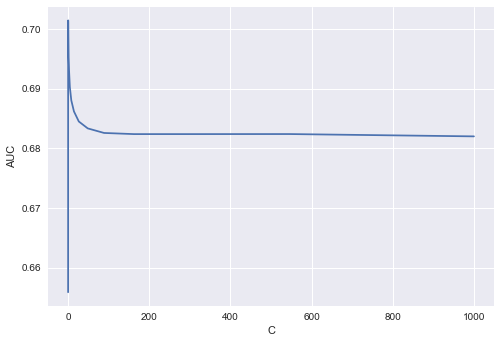

In [87]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('AUC');

## Отбор признаков для логистической регрессии с помощью случайного леса (RFE)

In [88]:
# импортируем класс RFE
from sklearn.feature_selection import RFE
# создаем экземпляр класса RFE, отберем первые 100 переменных 
# с помощью случайного леса
select = RFE(RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1),
             n_features_to_select=100)
# подгоняем модель и применяем к нашим массивам, обратите внимание,
# мы используем массивы, отмасштабированные с помощью StandardScaler
select.fit(X_train_scaled, y_train)
X_train_rfe= select.transform(X_train_scaled)
X_test_rfe= select.transform(X_test_scaled)

In [89]:
# смотрим форму массива
print("Форма исходного обучающего массива: {}".format(str(X_train_rfe.shape)))
print("Форма исходного тестового массива: {}".format(str(X_test_rfe.shape)))

Форма исходного обучающего массива: (10656, 100)
Форма исходного тестового массива: (4567, 100)


In [90]:
# взглянем, какие переменные были отобраны
mask=select.get_support()
feat_labels = X_train.columns
for c, feature in zip(mask, feat_labels):
    print(feature, c)
    
# можно было еще воспользоваться вот таким программным кодом:
# for i, (a, b) in enumerate(zip(feat_labels, mask)): print(i, a, b)

AGE True
CHILD_TOTAL True
DEPENDANTS True
PERSONAL_INCOME True
OWN_AUTO True
CREDIT True
TERM True
FST_PAYMENT True
FACT_LIVING_TERM True
WORK_TIME True
LOAN_NUM_TOTAL True
LOAN_NUM_CLOSED True
LOAN_NUM_PAYM True
LOAN_DLQ_NUM True
LOAN_MAX_DLQ True
LOAN_AVG_DLQ_AMT True
LOAN_MAX_DLQ_AMT True
PREVIOUS_CARD_NUM_UTILIZED True
CHILD_DEPENDANTS True
PAYMENT True
PTI True
CLOSED_TO_TOTAL True
PAYM_TO_LOAN True
DLQ_TO_PAYM True
FST_SHARE True
DLQ_TIME True
LOAN_MAX_DLQ_RANGE True
SOCSTATUS_WORK_FL_0 False
SOCSTATUS_WORK_FL_1 False
SOCSTATUS_PENS_FL_0 False
SOCSTATUS_PENS_FL_1 False
GENDER_0 True
GENDER_1 True
EDUCATION_Высшее True
EDUCATION_Неоконченное высшее True
EDUCATION_Неполное среднее False
EDUCATION_Среднее True
EDUCATION_Среднее специальное True
MARITAL_STATUS_Вдовец/Вдова False
MARITAL_STATUS_Гражданский брак False
MARITAL_STATUS_Не состоял в браке True
MARITAL_STATUS_Разведен(а) True
MARITAL_STATUS_Состою в браке True
GEN_INDUSTRY_Банк/Финансы False
GEN_INDUSTRY_Государственная слу

## Построение логистической регрессии по массиву признаков, редуцированному с помощью RFE

In [91]:
logreg = LogisticRegression().fit(X_train_rfe, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_rfe)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_rfe)[:, 1])))

AUC на обучающей выборке: 0.723
AUC на контрольной выборке: 0.701


## Настройка параметров логистической регрессии с помощью решетчатого поиска по массиву признаков, редуцированному с помощью RFE

In [92]:
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid2 = LogisticRegression(penalty='l1')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid2 = {'C': [0.1, 0.12, 0.14, 0.16]}
# создаем экземпляр класса GridSearchCV
grid_search2 = GridSearchCV(logreg_grid2, param_grid2, scoring='roc_auc', n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search2.fit(X_train_rfe, y_train)
# проверяем модель со значением параметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search2.predict_proba(X_test_rfe)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшие значения параметров: {}".format(grid_search2.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search2.best_score_))

AUC на тестовой выборке: 0.701
Наилучшие значения параметров: {'C': 0.14}
Наилучшее значение AUC: 0.703


## Отбор признаков для логистической регрессии с помощью пакета BorutaPy (на основе случайного леса)

In [93]:
# устанавливаем пакет boruta в Anaconda Promt
# с помощью строки pip install Boruta
# импортируем класс BorutaPy
from boruta import BorutaPy

In [94]:
# создаем экземпляр класса RandomForestClassifier,
# задаем модель леса с 50 деревьями глубиной 10
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [95]:
# создаем экземпляр класса BorutaPy, т.е. задаем модель BorutaPy
boruta_selector = BorutaPy(rf, n_estimators=10, verbose=2, alpha=0.06, perc=10, max_iter=50, random_state=42)
boruta_selector

BorutaPy(alpha=0.06,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
     max_iter=50, n_estimators=10, perc=10, random_state=42, two_step=True,
     verbose=2)

In [96]:
# обучаем модель Boruta, отбирая с помощью случайного леса предикторы
boruta_selector.fit(X_train_scaled3, y_train)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	92
Tentative: 	361
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	92
Tentative: 	361
Rejected: 	0
Iteration: 	9 / 50
Confirmed: 	92
Tentative: 	361
Rejected: 	0
Iteration: 	10 / 50
Confirmed: 	92
Tentative: 	353
Rejected: 	8
Iteration: 	11 / 50
Confirmed: 	92
Tentative: 	353
Rejected: 	8
Iteration: 	12 / 50
Confirmed: 	120
Tentative: 	325
Rejected: 	8
Iteration: 	13 / 50
Confirmed: 	120
Tentative: 	325
Rejected: 	8
Iteration: 	14 / 50
Confirmed: 	120
Tentative: 	325
Rejected: 	8
Iteration: 	15 / 50
Confirmed: 	128
Tentative: 	317
Rejected: 	8
Iteration: 	16 / 50
Confirmed: 	128
Tentative: 	314

BorutaPy(alpha=0.06,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x000001BBCB9ACB88>,
            verbose=0, warm_start=False),
     max_iter=50, n_estimators=10, perc=10,
     random_state=<mtrand.RandomState object at 0x000001BBCB9ACB88>,
     two_step=True, verbose=2)

In [97]:
# преобразуем данные с помощью модели BorutaPy, то есть 
# фильтруем предикторы согласно обученной модели BorutaPy
X_train_boruta= boruta_selector.transform(X_train_scaled3)
X_test_boruta= boruta_selector.transform(X_test_scaled3)
# смотрим форму массива
print("Форма исходного обучающего массива: {}".format(str(X_train_boruta.shape)))
print("Форма исходного тестового массива: {}".format(str(X_test_boruta.shape)))

Форма исходного обучающего массива: (10656, 177)
Форма исходного тестового массива: (4567, 177)


## Построение логистической регрессии по массиву признаков, редуцированному с помощью BorutaPy (на основе случайного леса)

In [98]:
logreg = LogisticRegression().fit(X_train_boruta, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_boruta)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_boruta)[:, 1])))

AUC на обучающей выборке: 0.729
AUC на контрольной выборке: 0.705


## Настройка параметров логистической регрессии с помощью решетчатого поиска по массиву признаков, редуцированному с помощью BorutaPy

In [99]:
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid3 = LogisticRegression(penalty='l1')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid3 = {'C': [1.0, 0.9, 0.8, 0.7]}
# создаем экземпляр класса GridSearchCV
grid_search3 = GridSearchCV(logreg_grid3, param_grid3, scoring='roc_auc', n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search3.fit(X_train_boruta, y_train)
# проверяем модель со значением параметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search3.predict_proba(X_test_boruta)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшие значения параметров: {}".format(grid_search3.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search3.best_score_))

AUC на тестовой выборке: 0.706
Наилучшие значения параметров: {'C': 0.7}
Наилучшее значение AUC: 0.700


## Отбор признаков для логистической регрессии с помощью пакета BorutaPy (на основе градиентного бустинга)

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(max_depth=10, random_state=42)
boruta_selector2 = BorutaPy(boost, n_estimators=10, verbose=2, alpha=0.06, perc=10, max_iter=50, random_state=42)
boruta_selector2.fit(X_train_scaled3, y_train)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	453
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	116
Tentative: 	337
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	116
Tentative: 	337
Rejected: 	0
Iteration: 	9 / 50
Confirmed: 	116
Tentative: 	337
Rejected: 	0
Iteration: 	10 / 50
Confirmed: 	116
Tentative: 	325
Rejected: 	12
Iteration: 	11 / 50
Confirmed: 	116
Tentative: 	325
Rejected: 	12
Iteration: 	12 / 50
Confirmed: 	136
Tentative: 	305
Rejected: 	12
Iteration: 	13 / 50
Confirmed: 	136
Tentative: 	305
Rejected: 	12
Iteration: 	14 / 50
Confirmed: 	136
Tentative: 	305
Rejected: 	12
Iteration: 	15 / 50
Confirmed: 	140
Tentative: 	295
Rejected: 	18
Iteration: 	16 / 50
Confirmed: 	140
Tent

BorutaPy(alpha=0.06,
     estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samp...RandomState object at 0x000001BBC2C3E318>,
              subsample=1.0, verbose=0, warm_start=False),
     max_iter=50, n_estimators=10, perc=10,
     random_state=<mtrand.RandomState object at 0x000001BBC2C3E318>,
     two_step=True, verbose=2)

In [101]:
X_train_boruta2= boruta_selector2.transform(X_train_scaled3)
X_test_boruta2= boruta_selector2.transform(X_test_scaled3)
# смотрим форму массива
print("Форма исходного обучающего массива: {}".format(str(X_train_boruta2.shape)))
print("Форма исходного тестового массива: {}".format(str(X_test_boruta2.shape)))

Форма исходного обучающего массива: (10656, 179)
Форма исходного тестового массива: (4567, 179)


## Построение логистической регрессии по массиву признаков, редуцированному с помощью BorutaPy (на основе градиентного бустинга)

In [102]:
logreg = LogisticRegression().fit(X_train_boruta2, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_boruta2)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_boruta2)[:, 1])))

AUC на обучающей выборке: 0.733
AUC на контрольной выборке: 0.704


# Подключение библиотеки H2O и подготовка данных

In [103]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gewissta\AppData\Local\Temp\tmpgj9q7p7m
  JVM stdout: C:\Users\Gewissta\AppData\Local\Temp\tmpgj9q7p7m\h2o_Gewissta_started_from_python.out
  JVM stderr: C:\Users\Gewissta\AppData\Local\Temp\tmpgj9q7p7m\h2o_Gewissta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  -------------------------------
H2O cluster uptime:         06 secs
H2O cluster version:        3.17.0.4124
H2O cluster version age:    3 months and 1 day
H2O cluster name:           H2O_from_python_Gewissta_1ozzkp
H2O cluster total nodes:    1
H2O cluster free memory:    7.111 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Algos, AutoML, Core V3, Core V4
Python version:             3.6.1 final
--------------------------  -------------------------------

In [104]:
# библиотека h2o пока не поддерживает кириллицу и чтобы не выводилась абракадабра,
# представим значения категориальных переменных (категории) в виде чисел,
# по-прежнему обрабатывая их как категориальные
for i in ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
          'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
          'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 
          'GENDER + FAMILY_INCOME']:
    if i in train.columns:
        train[i] = pd.Categorical(train[i])
        train[i] = train[i].cat.codes

for i in ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
          'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
          'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 
          'GENDER + FAMILY_INCOME']:
    if i in test.columns:
        test[i] = pd.Categorical(test[i])
        test[i] = test[i].cat.codes

In [105]:
# давайте посмотрим, что у нас получилось
train.head()

TARGET  AGE SOCSTATUS_WORK_FL SOCSTATUS_PENS_FL GENDER  CHILD_TOTAL  \
14692      0   31                 1                 0      0            1   
6417       0   31                 1                 0      0            1   
7119       0   46                 1                 0      1            3   
5163       0   57                 1                 0      0            2   
11682      0   58                 1                 1      1            2   

       DEPENDANTS  EDUCATION  MARITAL_STATUS  GEN_INDUSTRY  GEN_TITLE  \
14692           1          0               4             7          3   
6417            1          4               4            17          1   
7119            1          0               4             2          3   
5163            0          3               4             6          0   
11682           0          3               4             9          2   

       ORG_TP_STATE  ORG_TP_FCAPITAL  JOB_DIR  FAMILY_INCOME  PERSONAL_INCOME  \
14692             4                0        7              1            9.616   
6417              4                0        0              2            9.616   
7119              1                0        7              1            9.473   
5163              4                0        0              1            9.473   
11682             2                1        7              1            9.473   

       REG_ADDRESS_PROVINCE  FACT_ADDRESS_PROVINCE  POSTAL_ADDRESS_PROVINCE  \
14692                    18                     18                       18   
6417                      6                      6                        6   
7119                     42                     42                       42   
5163                     48                     48                       48   
11682                    24                     24                       24   

       TP_PROVINCE  REGION_NM REG_FACT_FL FACT_POST_FL REG_POST_FL  \
14692           51          9           1            1           1   
6417             6          6           1            1           1   
7119            38          3           1            1           1   
5163            44          9           1            1           1   
11682           21          2           1            1           1   

      REG_FACT_POST_FL REG_FACT_POST_TP_FL FL_PRESENCE_FL  OWN_AUTO  \
14692                1                   0              0         0   
6417                 1                   1              1         0   
7119                 1                   1              0         0   
5163                 1                   1              0         1   
11682                1                   1              0         0   

      AUTO_RUS_FL HS_PRESENCE_FL         ...         WORK_TIME FACT_PHONE_FL  \
14692           0              1         ...             4.127             1   
6417            0              0         ...             2.891             0   
7119            0              1         ...             4.788             0   
5163            0              0         ...             5.124             0   
11682           0              1         ...             3.871             0   

      REG_PHONE_FL  GEN_PHONE_FL  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  \
14692            0             1               2                1   
6417             0             1               1                0   
7119             0             1               1                0   
5163             0             1               1                0   
11682            0             1               4                3   

      LOAN_NUM_PAYM  LOAN_DLQ_NUM  LOAN_MAX_DLQ LOAN_AVG_DLQ_AMT  \
14692             3             0             0           -4.605   
6417              4             0             0           -4.605   
7119              4             0             0           -4.605   
5163              4             0             0           -4.605   
11682            38             4             1           

In [106]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [107]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:10656
Cols:68




TARGET AGE SOCSTATUS_WORK_FL SOCSTATUS_PENS_FL GENDER CHILD_TOTAL DEPENDANTS EDUCATION MARITAL_STATUS GEN_INDUSTRY GEN_TITLE ORG_TP_STATE ORG_TP_FCAPITAL JOB_DIR FAMILY_INCOME PERSONAL_INCOME REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE TP_PROVINCE REGION_NM REG_FACT_FL FACT_POST_FL REG_POST_FL REG_FACT_POST_FL REG_FACT_POST_TP_FL FL_PRESENCE_FL OWN_AUTO AUTO_RUS_FL HS_PRESENCE_FL COT_PRESENCE_FL GAR_PRESENCE_FL LAND_PRESENCE_FL CREDIT TERM FST_PAYMENT GPF_DOCUMENT_FL FACT_LIVING_TERM WORK_TIME FACT_PHONE_FL REG_PHONE_FL GEN_PHONE_FL LOAN_NUM_TOTAL LOAN_NUM_CLOSED LOAN_NUM_PAYM LOAN_DLQ_NUM LOAN_MAX_DLQ LOAN_AVG_DLQ_AMT LOAN_MAX_DLQ_AMT PREVIOUS_CARD_NUM_UTILIZED FACT_TP_FL AUTO_FOR_FL GENDER + FAMILY_INCOME PERSONAL_FAMILY_INCOME CREDITCAT FSTPAYMENTCAT AGECAT REGIONCAT ORGCAT CHILD_DEPENDANTS PAYMENT PTI CLOSED_TO_TOTAL PAYM_TO_LOAN DLQ_TO_PAYM FST_SHARE DLQ_TIME LOAN_MAX_DLQ_RANGE 
 
 
 type int int int int int int int int int int int int int int int real int int int int int int int int int int int int int int int int int real int real int real real int int int int int int int int real real int int int int int enum enum enum int int real real real real real real real real real 
 mins 0.0 21.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.575589779749771 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.600907459529583 3.0 0.0 0.0 0.0 0.009950330853168092 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 -4.605170185988091 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 -1.2654857681365164 -0.1469085802487958 0.0 0.5 0.0 0.0 0.0 1.0 
 mean 0.11542792792792793 40.636355105105196 0.9046546546546547 0.13945195195195195 0.6587837837837838 1.1036974474474501 0.6371058558558562 2.723911411411402 3.21499624624625 10.073292042041995 0.938907657657658 2.02233483483483 0.15972222222222238 5.972316066066085 1.6860923423423457 9.388783623741526 35.66835585585589 35.62321696696679 35.64151651651664 33.0897147147147 4.4815127627627716 0.8416854354354354 0.950168918918919 0.8903903903903904 0.8411223723723724 0.9061561561561562 0.30930930930930933 0.1119557057057057 0.07057057057057058 0.21818693693693694 0.008915165165165165 0.019144144144144143 0.04316816816816817 9.332735357941994 8.113926426426419 3349.7982160285283 0.5914039039039038 4.637834799002583 3.85123627942554 0.6088588588588588 0.054804804804804805 0.9052177177177178 1.3810998498498555 0.7448385885885886 7.864207957957948 0.19510135135135062 0.13016141141141147 -3.0994259866931313 246.5180564939937 0.019144144144144146 0.898460960960961 0.1119557057057057 4.980011261261261 0.3691816816816817 1.8003941441441442 1.890390390390392 0.4561738991426494 0.26271959679200413 0.02797414505661082 0.43742190851565926 5.160124552312052 0.02456767686347925 0.9134681987676699 0.10662220479928833 32.697765457452114 
 maxs 1.0 67.0 1.0 1.0 1.0 10.0 6.0 4.0 4.0 23.0 3.0 4.0 2.0 7.0 4.0 12.429216236844384 72.0 72.0 72.0 66.0 9.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 11.69274397508825 36.0 140000.0 1.0 8.962809493114328 6.269115222920853 1.0 1.0 1.0 11.0 11.0 114.0 13.0 8.0 9.81504806537334 18310.0 2.0 1.0 1.0 9.0 1.0 3.0 3.0 1.0 1.2951050395629988 0.13626730836334836 1.0 39.5 0.8333333333333334 0.9999263700432414 1.0 1864.5028358542768 
 sigma 0.3195526625510539 11.611818911595636 0.2937051339187052 0.346433785658999 0.4741400710021005 0.9962112327843544 0.8094751150910229 1.5326800557201978 1.1226286274546249 6.773064485597308 0.8417334176702378 1.7930645968444652 0.39305954091062434 1.9393631303678684 0.7771356571861308 0.5168513283492893 21.2608477727138 21.269988454008033 21.26327248432523 19.115245420426284 2.8184609292636056 0.3650528306654707 0.21760603890860386 0.3124171933049553 0.3655790873608235 0.29162502941442214 0.4622305819485094 0.315326745850732 0.2561181777414193 0.41303438961354905 0.0940027353203415 0.13703798094318576 0.20324505892803868 0.7213221461684235 4.12668569220898 5137.178729807006 0.49159740174830796 1.53955530653087 1.098744847465688

In [108]:
# преобразовываем категориальные переменные, неправильно прочитанные 
# как целочисленные (тип int), в категориальные (тип enum)
for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
          'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 
          'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 
          'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 
          'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 
          'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL',
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 
          'FACT_TP_FL', 'AUTO_FOR_FL', 'GENDER + FAMILY_INCOME', 'PERSONAL_FAMILY_INCOME', 
          'CREDITCAT', 'FSTPAYMENTCAT', 'AGECAT', 'REGIONCAT', 'ORGCAT']:
    if i in tr.columns:
        tr[i]=tr[i].asfactor()

for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
          'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 
          'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 
          'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 
          'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 
          'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL',
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 
          'FACT_TP_FL', 'AUTO_FOR_FL', 'GENDER + FAMILY_INCOME', 'PERSONAL_FAMILY_INCOME', 
          'CREDITCAT', 'FSTPAYMENTCAT', 'AGECAT', 'REGIONCAT', 'ORGCAT']:        
    if i in valid.columns:
        valid[i]=valid[i].asfactor()

In [109]:
# снова смотрим обучающий фрейм
tr.describe()

Rows:10656
Cols:68




TARGET AGE SOCSTATUS_WORK_FL SOCSTATUS_PENS_FL GENDER CHILD_TOTAL DEPENDANTS EDUCATION MARITAL_STATUS GEN_INDUSTRY GEN_TITLE ORG_TP_STATE ORG_TP_FCAPITAL JOB_DIR FAMILY_INCOME PERSONAL_INCOME REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE TP_PROVINCE REGION_NM REG_FACT_FL FACT_POST_FL REG_POST_FL REG_FACT_POST_FL REG_FACT_POST_TP_FL FL_PRESENCE_FL OWN_AUTO AUTO_RUS_FL HS_PRESENCE_FL COT_PRESENCE_FL GAR_PRESENCE_FL LAND_PRESENCE_FL CREDIT TERM FST_PAYMENT GPF_DOCUMENT_FL FACT_LIVING_TERM WORK_TIME FACT_PHONE_FL REG_PHONE_FL GEN_PHONE_FL LOAN_NUM_TOTAL LOAN_NUM_CLOSED LOAN_NUM_PAYM LOAN_DLQ_NUM LOAN_MAX_DLQ LOAN_AVG_DLQ_AMT LOAN_MAX_DLQ_AMT PREVIOUS_CARD_NUM_UTILIZED FACT_TP_FL AUTO_FOR_FL GENDER + FAMILY_INCOME PERSONAL_FAMILY_INCOME CREDITCAT FSTPAYMENTCAT AGECAT REGIONCAT ORGCAT CHILD_DEPENDANTS PAYMENT PTI CLOSED_TO_TOTAL PAYM_TO_LOAN DLQ_TO_PAYM FST_SHARE DLQ_TIME LOAN_MAX_DLQ_RANGE 
 
 
 type enum int enum enum enum int int enum enum enum enum enum enum enum enum real enum enum enum enum enum enum enum enum enum enum enum int enum enum enum enum enum real int real enum real real enum enum enum int int int int int real real int enum enum enum enum enum enum enum enum enum real real real real real real real real real 
 mins 21.0 0.0 0.0 7.575589779749771 0.0 7.600907459529583 3.0 0.0 0.0 0.009950330853168092 1.0 0.0 1.0 0.0 0.0 -4.605170185988091 0.0 0.0 0.0 -1.2654857681365164 -0.1469085802487958 0.0 0.5 0.0 0.0 0.0 1.0 
 mean 40.636355105105196 1.1036974474474501 0.6371058558558562 9.388783623741526 0.1119557057057057 9.332735357941994 8.113926426426419 3349.7982160285283 4.637834799002583 3.85123627942554 1.3810998498498555 0.7448385885885886 7.864207957957948 0.19510135135135062 0.13016141141141147 -3.0994259866931313 246.5180564939937 0.019144144144144146 0.4561738991426494 0.26271959679200413 0.02797414505661082 0.43742190851565926 5.160124552312052 0.02456767686347925 0.9134681987676699 0.10662220479928833 32.697765457452114 
 maxs 67.0 10.0 6.0 12.429216236844384 1.0 11.69274397508825 36.0 140000.0 8.962809493114328 6.269115222920853 11.0 11.0 114.0 13.0 8.0 9.81504806537334 18310.0 2.0 1.0 1.2951050395629988 0.13626730836334836 1.0 39.5 0.8333333333333334 0.9999263700432414 1.0 1864.5028358542768 
 sigma 11.611818911595636 0.9962112327843544 0.8094751150910229 0.5168513283492893 0.315326745850732 0.7213221461684235 4.12668569220898 5137.178729807006 1.53955530653087 1.0987448474656887 0.7818538840401797 0.9828761996678534 7.951309528660624 0.6814140685752194 0.35811516101302376 3.9728478527822917 833.6814982901625 0.13772114406894734 0.3718996903526791 0.4479750124912641 0.047736241838075004 0.469819178324581 2.4535864839606196 0.07970636403615355 0.2712131982165418 0.2963466576012123 101.01436145166673 
 zeros 0 3494 5815 0 9463 0 0 861 12 0 0 5492 0 9312 9312 0 9312 10453 3494 0 0 5492 0 9312 861 9312 0 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 0 31.0 1 0 0 1.0 1.0 0 4 7 3 4 0 7 1 9.615806146750792 18 18 18 51 9 1 1 1 1 0 0 0.0 0 1 0 0 0 9.099409928586711 3.0 1600.0 1 6.109114744289606 4.127295662361787 1 0 1 2.0 1.0 3.0 0.0 0.0 -4.605170185988091 0.0 0.0 0 0 1 1 (7292.0, 9427.0] (1500.0, 4995.0] (29.0, 43.0] 1 1 0.5 1.1128887739034714 0.11573535873323731 0.5 1.5 0.0 0.994345029354656 0.0 1.0 
 1 0 31.0 1 0 0 1.0 1.0 4 4 17 1 4 0 0 2 9.615806146750792 6 6 6 6 6 1 1 1 1 1 1 0.0 0 0 0 0 0 9.762327708551636 9.0 2000.0 0 3.914867641168863 2.8909271591878647 0 0 1 1.0 0.0 4.0 0.0 0.0 -4.605170185988091 0.0 0.0 1 0 2 0 (14169.0, 27449.0] (1500.0, 4995.0] (29.0, 43.0] 1 1 0.5 0.09048316551864606 0.009409836693642225 0.0 4.0 0.0 0.9951425461737646 0.0 1.0 
 2 0 46.0 1 0 1 3.0 1.0 0 4 2 3 1 0 7 1 9.472705405674148 42 42 42 38 3 1 1 1 1 1 0 0.0 0 1 0 0 0 10.057067069280803 10.0 2600.0 1 6.214465011907717 4.78757507264335 0 0 1 1.0 0.0 4.0 0.0 0.0 -4.605170185988091 0.0 0.0 1 0 6 1 (14169.0, 27449.0

In [110]:
# задаем название зависимой переменной
dependent = 'TARGET'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

# Построение логистической регрессии в H2O

In [111]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### `Параметры класса H2OGeneralizedLinearEstimator`

- **`family`** – вид распределения целевой переменной (аналогичный параметр для градиентного бустинга или глубокого обучения называется `distribution`). Возможные варианты для регрессии: `'gaussian'`, `'poisson'`, `'gamma'`, `'tweedie'`. Для биномиальной классификации (логистической регрессии) нужно задать значение `'binomial'`, а для многоклассовой классификации – `'multinomial'`;
- **`link`** – задает связующую функцию, возможные значения: `'family_default'`, `'identity'`, `'logit'`, `'log'`, `'inverse'`, `'tweedie'`;
- **`alpha`** - задает тип регуляризации. Значение `1` соответствует l1-регуляризации (лассо), значение `0` соответствует l2-регуляризации (гребневой регрессии), промежуточное значение соответствует комбинации штрафов l1 и l2 (эластичной сети);
- **`lambda`** - задает силу регуляризации, значение `0` соответствует отсутствию регуляризации и параметр `alpha` игнорируется;
- **`lambda_search`** - если задан данный параметр, GLM будет вычислять модели по полному пути регуляризации. Путь регуляризации начинается с максимального значения `lambda` и двигается к минимальному значению, уменьшая силу регуляризации на каждом шаге. Значения `lambda` задаются в логарифмической шкале. Возвращенная модель будет иметь коэффициенты, соответствующие "оптимальному" значению `lambda`, выясненному в ходе обучения. Когда задано значение `alpha>0`, перебор значений `lambda` можно использовать для эффективной обработки наборов с большим количеством предикторов, поскольку это позволяет удаляеть бесполезные (шумовые) предикторы и строить модели лишь для небольшого поднабора предикторов. Возможное применение перебора значений `lambda` может быть следующим: запускаете его на наборе с большим количеством предикторов, но при этом ограничиваете количество активных предикторов относительно небольшим значением;
- **`lambda_min_ratio`** – задает минимальное значение `lambda`, заданное как процент от начального (максимального) значения. По умолчанию этот параметр равен `0.0001`. Например, если начальное значение `lambda` составляло `15`, то параметр `lambda_min_ratio` будет равен `0.0015`. Значение `0` никогда не проверяется в ходе автоматического поиска, так что при необходимости такое значение
следует задавать вручную;
- **`nlambdas`** – задает количество проверяемых значений параметра `lambda`. По умолчанию равно `–1`, это означает, что будет проверено 100 значений `lambda` при `alpha = 1` (гребневой регрессии) и 30 значений `lambda` при `alpha = 0` (лассо-регрессии). Можно задать меньшее значение для экономии времени;
- **`max_active_predictors`** - ограничивает количество активных предикторов. Значение по умолчанию равно `–1`, что означает отсутствие ограничений, но можно задать и другое значение для ранней остановки lambda_search при достижении заданного количества ненулевых коэффициентов;
- **`solver`** - задает оптимизатор, возможные значения: `'AUTO'`, `'IRLSM'`, `'L_BFGS'`, `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'`. `'AUTO'` - алгоритм выбирается на основе используемых данных и других параметров. `'IRLSM'` – метод наименьших квадратов с итеративным пересчётом весов (iterative reweighted least qquares method). Оптимальный вариант для относительно небольших объемов данных (до 500 переменных, хотя объем в основном ограничен количеством доступной памяти). Для большего количества переменных можно применять IRLSM при использовании регуляризации с большими значениями `alpha`, чтобы получить большое количество нулевых коэффициентов. `'L_BFGS'` – L означает «ограниченная память» (limited memory), а BFGS – алгоритм Бройдена–Флетчера–Гольдфарба–Шанно (Broyden–Fletcher–Goldfarb–Shanno algorithm). Википедия (https://en.wikipedia.org/wiki/Limitedmemory_BFGS) описывает его как квазиньютоновский метод, начните с изучения этой статьи, если вас интересуют подробности. Этот метод используют вместо IRLSM при работе с большим количеством переменных (реализация в H2O поддерживает работу с сотнями тысяч переменных). `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'` – экспериментальные варианты IRLSM (см. https://en.wikipedia.org/wiki/Coordinate_descent). Хорошо подходят для данных, содержащих до 5000 переменных, и представляющих собой разреженные признаки. Они могут повысить качество, когда данные содержат категориальные переменные с большим количеством уровней. `'COORDINATE_DESCENT'` может дать лучшее качество при использовании перебора значений lambda;
- **`standardize`** - стандартизирует переменные (используется по умолчанию, не рекомендуется отключать);
- **`remove_collinear_columns`** - удаляет коррелирующие столбцы в ходе построения модели (не используется по умолчанию). Параметр следует задавать только в тех случаях, когда регуляризация не используется (`lambda=0`), в противном случае это только приведет к ухудшению качества; 
- **`interactions`** - задает список предикторов для создания парных взаимодействий;
- **`compute_p_values`** - вычисляет p-значения. Можно задать только в тех случаях, когда не используется штраф (`lambda=0`). Рекомендуется задать параметр `remove_collinear_columns`. H2O вернет ошибку, если запрошено вычисление p-значений, при этом есть коррелирующие столбцы, но параметр `remove_collinear_columns` не задан;
- **`training_frame`** - задает обучающий фрейм;
- **`validation_frame`** - задает контрольный фрейм;
- **`nfolds`** - задает количество блоков перекрестной проверки;
- **`keep_cross_validation_predictions`** - задает сохранение прогнозов перекрестной проверки.

In [112]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", seed=1000000)
# обучаем модель
glm_model.train(predictors, dependent, training_frame= tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [113]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1520342470725_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0929382924563389
RMSE: 0.30485782334776795
LogLoss: 0.3166412750455999
Null degrees of freedom: 10655
Residual degrees of freedom: 10348
Null deviance: 7623.630033666098
Residual deviance: 6748.258853771825
AIC: 7364.258853771825
AUC: 0.7453851912803025
Gini: 0.4907703825606049
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1726552210226034: 


0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7864  1562  0.1657   (1562.0/9426.0)
1      644   586   0.5236   (644.0/1230.0)
Total  8508  2148  0.207    (2206.0/10656.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.172655     0.346951  192
max f2                       0.106352     0.484285  263
max f0point5                 0.227433     0.322308  149
max accuracy                 0.518394     0.884947  28
max precision                0.757134     1         0
max recall                   0.00946227   1         396
max specificity              0.757134     1         0
max absolute_mcc             0.13579      0.249955  228
max min_per_class_accuracy   0.119587     0.681519  247
max mean_per_class_accuracy  0.123382     0.6844    243

Gains/Lift Table: Avg response rate: 11,54 %



group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  ---------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100413                   0.457201           4.37219    4.37219            0.504673         0.504673                    0.0439024       0.0439024                  337.219   337.219
    2        0.0200826                   0.398084           3.96736    4.16977            0.457944         0.481308                    0.0398374       0.0837398                  296.736   316.977
    3        0.03003                     0.360698           3.43267    3.92561            0.396226         0.453125                    0.0341463       0.117886                   243.267   292.561
    4        0.0400713                   0.328355           2.67189    3.61145            0.308411         0.416862                    0.0268293       0.144715                   167.189   261.145
    5        0.0500188                   0.302941           2.45191    3.38084            0.283019         0.390244                    0.0243902       0.169106                   145.191   238.084
    6        0.100038                    0.237082           2.24306    2.81195            0.258912         0.324578                    0.112195        0.281301                   124.306   181.195
    7        0.150056                    0.198846           2.08052    2.56814            0.24015          0.296435                    0.104065        0.385366                   108.052   156.814
    8        0.200075                    0.172504           1.77169    2.36903            0.204503         0.273452                    0.0886179       0.473984                   77.1693   136.903
    9        0.300019                    0.136202           1.41543    2.05136            0.16338          0.236784                    0.141463        0.615447                   41.5431   105.136
    10       0.400056                    0.109481           1.03213    1.7965             0.119137         0.207366                    0.103252        0.718699                   3.21329   79.6495
    11       0.5                         0.0883675          0.723985   1.58211            0.0835681        0.18262                     0.0723577       0.791057                   -27.6015  58.2114
    12       0.600038                    0.0708164          0.845211   1.45926            0.097561         0.168439                    0.0845528       0.87561                    -15.4789  45.9258
    13       0.699981                    0.0565362          0.455541   1.31595            0.0525822        0.151897                    0.0455285       0.921138                   -54.4459  31.5947
    14       0.800019                    0.0423261          0.390097   1.20018            0.0450281        0.138534                    0.0390244       0.960163                   -60.9903  20.0175
    15       0.899962                    0.0276036          0.317252   1.10212            0.0366197        0.127216                    0.0317073       0.99187                    -68.2748  10.2124
    16       1                           0.00371718         0.0812703  1                  0.00938086       0.115428                    0.00813008      1                          -91.873   0



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1054298781313549
RMSE: 0.3246996737469179
LogLoss: 0.35676671376636365
Null degrees of freedom: 4566
Residual degrees of freedom: 4259
Null deviance: 3490.733555110778
Residual deviance: 3258.7071635419657
AIC: 3874.7071635419657
AUC: 0.6911114273025564
Gini: 0.38222285460511274
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1620083669943248: 


0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3176  809   0.203    (809.0/3985.0)
1      315   267   0.5412   (315.0/582.0)
Total  3491  1076  0.2461   (1124.0/4567.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.162008     0.322075  203
max f2                       0.054287     0.468085  339
max f0point5                 0.231865     0.295438  144
max accuracy                 0.501139     0.87344   26
max precision                0.876595     1         0
max recall                   0.0138387    1         391
max specificity              0.876595     1         0
max absolute_mcc             0.162008     0.200962  203
max min_per_class_accuracy   0.11239      0.630584  256
max mean_per_class_accuracy  0.122044     0.636717  245

Gains/Lift Table: Avg response rate: 12,74 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100723                   0.474163           3.75295   3.75295            0.478261         0.478261                    0.0378007       0.0378007                  275.295   275.295
    2        0.0201445                   0.409761           2.38824   3.0706             0.304348         0.391304                    0.024055        0.0618557                  138.824   207.06
    3        0.0299978                   0.363949           2.44131   2.8639             0.311111         0.364964                    0.024055        0.0859107                  144.131   186.39
    4        0.0400701                   0.337564           3.41177   3.00161            0.434783         0.382514                    0.0343643       0.120275                   241.177   200.161
    5        0.0501423                   0.315889           1.36471   2.6728             0.173913         0.340611                    0.0137457       0.134021                   36.4709   167.28
    6        0.100066                    0.244055           2.13385   2.40392            0.27193          0.306346                    0.106529        0.24055                    113.385   140.392
    7        0.149989                    0.202692           1.58318   2.13074            0.201754         0.271533                    0.0790378       0.319588                   58.3183   113.074
    8        0.200131                    0.175709           1.61054   2.0004             0.20524          0.254923                    0.080756        0.400344                   61.0536   100.04
    9        0.299978                    0.137232           1.32506   1.77562            0.16886          0.226277                    0.132302        0.532646                   32.5055   77.5616
    10       0.400044                    0.111613           0.978739  1.57629            0.124726         0.200876                    0.0979381       0.630584                   -2.12615  57.6288
    11       0.500109                    0.0910374          0.961568  1.45329            0.122538         0.185201                    0.0962199       0.726804                   -3.84323  45.329
    12       0.599956                    0.073372           0.774383  1.3403             0.0986842        0.170803                    0.0773196       0.804124                   -22.5617  34.0304
    13       0.700022                    0.0574382          0.80703   1.26407            0.102845         0.161089                    0.080756        0.88488                    -19.297   26.4074
    14       0.799869                    0.0433322          0.619506  1.18361            0.0789474        0.150835                    0.0618557       0.946735                   -38.0494  18.3614
    15       0.899934                    0.0284888          0.291904  1.08446            0.0371991        0.1382                      0.0292096       0.975945                   -70.8096  8.44625
    16       1                           0.00477971         0.240392  1                  0.0306346        0.127436                    0.024055        1                          -75.9608  0


Scoring History: 


timestamp            duration    iterations    negative_log_likelihood    objective
--  -------------------  ----------  ------------  -------------------------  -----------
    2018-03-06 16:21:30  0.000 sec   0             3811.82                    0.357715
    2018-03-06 16:21:30  0.546 sec   1             3438.75                    0.324619
    2018-03-06 16:21:31  0.663 sec   2             3379.47                    0.319115
    2018-03-06 16:21:31  0.727 sec   3             3379.68                    0.319035
    2018-03-06 16:21:31  0.802 sec   4             3379.66                    0.319034
    2018-03-06 16:21:31  0.937 sec   5             3374.31                    0.318737
    2018-03-06 16:21:31  1.009 sec   6             3374.21                    0.318736
    2018-03-06 16:21:31  1.140 sec   7             3374.13                    0.31873

In [114]:
glm_model2 = H2OGeneralizedLinearEstimator(family= "binomial", seed=1000000, lambda_search=True)
glm_model2.train(predictors, dependent, training_frame= tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [115]:
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1520342470725_4


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09477659379634812
RMSE: 0.3078580741126471
LogLoss: 0.3238165501015958
Null degrees of freedom: 10655
Residual degrees of freedom: 10531
Null deviance: 7623.630033666098
Residual deviance: 6901.178315765211
AIC: 7151.178315765211
AUC: 0.7278946919004518
Gini: 0.4557893838009035
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16103655787878773: 


0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7723  1703  0.1807   (1703.0/9426.0)
1      643   587   0.5228   (643.0/1230.0)
Total  8366  2290  0.2202   (2346.0/10656.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.161037     0.333523  191
max f2                       0.096286     0.473416  272
max f0point5                 0.209917     0.299666  142
max accuracy                 0.573392     0.884666  6
max precision                0.573392     0.555556  6
max recall                   0.0140001    1         395
max specificity              0.70182      0.999894  0
max absolute_mcc             0.138752     0.233057  216
max min_per_class_accuracy   0.119038     0.666667  241
max mean_per_class_accuracy  0.11451      0.670497  248

Gains/Lift Table: Avg response rate: 11,54 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100413                   0.400006           3.56253   3.56253            0.411215         0.411215                    0.0357724       0.0357724                  256.253   256.253
    2        0.0200826                   0.344089           3.80543   3.68398            0.439252         0.425234                    0.0382114       0.0739837                  280.543   268.398
    3        0.03003                     0.313944           2.53364   3.30293            0.292453         0.38125                     0.0252033       0.099187                   153.364   230.293
    4        0.0400713                   0.293888           2.75286   3.16509            0.317757         0.36534                     0.0276423       0.126829                   175.286   216.509
    5        0.0500188                   0.273065           2.53364   3.03951            0.292453         0.350844                    0.0252033       0.152033                   153.364   203.951
    6        0.100038                    0.2182             2.21055   2.62503            0.255159         0.303002                    0.110569        0.262602                   121.055   162.503
    7        0.150056                    0.187617           2.0155    2.42186            0.232645         0.27955                     0.100813        0.363415                   101.55    142.186
    8        0.200075                    0.166144           1.75544   2.25525            0.202627         0.260319                    0.0878049       0.45122                    75.5439   125.525
    9        0.300019                    0.135777           1.39916   1.97007            0.161502         0.227401                    0.139837        0.591057                   39.9162   97.0066
    10       0.400056                    0.113292           1.10528   1.75382            0.12758          0.20244                     0.110569        0.701626                   10.5276   75.3818
    11       0.5                         0.0954389          0.862274  1.57561            0.0995305        0.181869                    0.0861789       0.787805                   -13.7726  57.561
    12       0.600038                    0.0802085          0.593273  1.41184            0.0684803        0.162965                    0.0593496       0.847154                   -40.6727  41.1836
    13       0.699981                    0.0661268          0.658908  1.30433            0.0760563        0.150556                    0.0658537       0.913008                   -34.1092  30.4332
    14       0.800019                    0.051866           0.414479  1.19306            0.0478424        0.137713                    0.0414634       0.954472                   -58.5521  19.3061
    15       0.899962                    0.036253           0.34979   1.09941            0.0403756        0.126903                    0.0349593       0.989431                   -65.021   9.94135
    16       1                           0.00765288         0.105651  1                  0.0121951        0.115428                    0.0105691       1                          -89.4349  0



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.10458308180980763
RMSE: 0.32339307631705355
LogLoss: 0.3522572833523916
Null degrees of freedom: 4566
Residual degrees of freedom: 4442
Null deviance: 3490.733555110778
Residual deviance: 3217.518026140745
AIC: 3467.518026140745
AUC: 0.7022397133580826
Gini: 0.4044794267161651
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13327992567586663: 


0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2861  1124  0.2821   (1124.0/3985.0)
1      248   334   0.4261   (248.0/582.0)
Total  3109  1458  0.3004   (1372.0/4567.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.13328      0.327451  223
max f2                       0.070639     0.478694  316
max f0point5                 0.190426     0.293941  158
max accuracy                 0.57218      0.873221  8
max precision                0.645711     0.75      3
max recall                   0.0252125    1         382
max specificity              0.760642     0.999749  0
max absolute_mcc             0.128995     0.208963  229
max min_per_class_accuracy   0.1176       0.642612  244
max mean_per_class_accuracy  0.128995     0.648173  229

Gains/Lift Table: Avg response rate: 12,74 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100723                   0.413827           3.24118   3.24118            0.413043         0.413043                    0.032646        0.032646                   224.118   224.118
    2        0.0201445                   0.353956           3.0706    3.15589            0.391304         0.402174                    0.0309278       0.0635739                  207.06    215.589
    3        0.0299978                   0.321709           2.61569   2.97845            0.333333         0.379562                    0.0257732       0.0893471                  161.569   197.845
    4        0.0400701                   0.295855           2.72942   2.91585            0.347826         0.371585                    0.0274914       0.116838                   172.942   191.585
    5        0.0501423                   0.275662           1.87648   2.70707            0.23913          0.344978                    0.0189003       0.135739                   87.6475   170.707
    6        0.100066                    0.222941           2.06502   2.38675            0.263158         0.304158                    0.103093        0.238832                   106.502   138.675
    7        0.149989                    0.190349           1.85852   2.21093            0.236842         0.281752                    0.0927835       0.331615                   85.8519   121.093
    8        0.200131                    0.168481           1.6448    2.06909            0.209607         0.263676                    0.0824742       0.414089                   64.4803   106.909
    9        0.299978                    0.138017           1.29064   1.80998            0.164474         0.230657                    0.128866        0.542955                   29.0638   80.9983
    10       0.400044                    0.115542           1.09893   1.63212            0.140044         0.207991                    0.109966        0.652921                   9.89345   63.2124
    11       0.500109                    0.0975662          0.875713  1.48078            0.111597         0.188704                    0.0876289       0.74055                    -12.4287  48.0775
    12       0.599956                    0.0820433          0.722757  1.35462            0.0921053        0.172628                    0.0721649       0.812715                   -27.7243  35.4623
    13       0.700022                    0.0668504          0.910055  1.29107            0.115974         0.164529                    0.0910653       0.90378                    -8.99449  29.1074
    14       0.799869                    0.0534718          0.46463   1.18791            0.0592105        0.151382                    0.0463918       0.950172                   -53.537   18.791
    15       0.899934                    0.0379109          0.326246  1.0921             0.0415755        0.139173                    0.032646        0.982818                   -67.3754  9.20996
    16       1                           0.0043156          0.171709  1                  0.0218818        0.127436                    0.0171821       1                          -82.8291  0


Scoring History: 


timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_test
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------
     2018-03-06 16:21:33  0.000 sec   1            ,65E-1    1             0.7154307464026602  0.7643384180229291
     2018-03-06 16:21:33  0.063 sec   3            ,59E-1    3             0.7130926717420074  0.7616136718837097
     2018-03-06 16:21:33  0.114 sec   5            ,54E-1    4             0.7106565817265715  0.7587326002808095
     2018-03-06 16:21:33  0.185 sec   7            ,49E-1    5             0.7076235547067471  0.7551629578454018
     2018-03-06 16:21:33  0.238 sec   9            ,45E-1    8             0.7035955803987262  0.75087355454939
---  ---                  ---         ---          ---       ---           ---                 ---
     2018-03-06 16:21:35  2.353 sec   60           ,9E-3     133           0.6466970506931705  0.7045170305983808
     2018-03-06 16:21:35  2.413 sec   61           ,82E-3    135           0.6457759089818043  0.704553298239047
     2018-03-06 16:21:35  2.486 sec   62           ,74E-3    146           0.6448968420735193  0.7046189934984886
     2018-03-06 16:21:36  2.548 sec   63           ,68E-3    160           0.6440646238781215  0.7047549312598981
     2018-03-06 16:21:36  2.604 sec   64           ,62E-3    170           0.6432592372100707  0.7049411099446754


See the whole table with table.as_data_frame()


# Настройка параметров логистической регрессии с помощью решетчатого поиска в H2O

In [116]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha': [0, 0.02, 0.04, 0.06, 0.08, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации,
# interactions задает список предикторов для
# парных взаимодействий)
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', lambda_search=True,
                                                        interactions=['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME',
                                                                      'GEN_TITLE', 'GEN_INDUSTRY', 'REGION_NM']),
                           grid_id="gridresults", hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, training_frame=tr, validation_frame=valid, seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [117]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha            model_ids              logloss
0    [0.04]  gridresults_model_2  0.35160597540574945
1    [0.06]  gridresults_model_3   0.3516419315300901
2     [0.0]  gridresults_model_0  0.35170221721026496
3    [0.08]  gridresults_model_4  0.35171047739453254
4    [0.02]  gridresults_model_1   0.3521478929146717
5     [1.0]  gridresults_model_5   0.3525279391844883


In [118]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
gridperf

      alpha            model_ids                 auc
0    [0.04]  gridresults_model_2  0.7046437025443351
1    [0.06]  gridresults_model_3  0.7044822293221574
2    [0.08]  gridresults_model_4  0.7043752991242934
3     [0.0]  gridresults_model_0  0.7041506594747485
4    [0.02]  gridresults_model_1  0.7040118226855864
5     [1.0]  gridresults_model_5  0.7023089161675872


In [119]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gridresults_model_2


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09445280630565625
RMSE: 0.3073317528431715
LogLoss: 0.3228200957096423
Null degrees of freedom: 10655
Residual degrees of freedom: 10240
Null deviance: 7623.630033666098
Residual deviance: 6879.9418797639
AIC: 7711.9418797639
AUC: 0.7331386633408027
Gini: 0.4662773266816054
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1487042814667772: 


0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7425  2001  0.2123   (2001.0/9426.0)
1      574   656   0.4667   (574.0/1230.0)
Total  7999  2657  0.2416   (2575.0/10656.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.148704     0.337535  196
max f2                       0.0993112    0.478634  263
max f0point5                 0.201466     0.301682  142
max accuracy                 0.515783     0.884854  11
max precision                0.528149     0.6       7
max recall                   0.0146747    1         397
max specificity              0.652867     0.999894  0
max absolute_mcc             0.136058     0.238986  211
max min_per_class_accuracy   0.121119     0.669919  231
max mean_per_class_accuracy  0.124075     0.672768  227

Gains/Lift Table: Avg response rate: 11,54 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain        cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  ----------  -----------------
    1        0.0100413                   0.378282           4.21026   4.21026            0.485981         0.485981                    0.0422764       0.0422764                  321.026     321.026
    2        0.0200826                   0.331465           2.99576   3.60301            0.345794         0.415888                    0.0300813       0.0723577                  199.576     260.301
    3        0.03003                     0.303724           2.94229   3.38415            0.339623         0.390625                    0.0292683       0.101626                   194.229     238.415
    4        0.0400713                   0.28113            2.67189   3.20567            0.308411         0.370023                    0.0268293       0.128455                   167.189     220.567
    5        0.0500188                   0.264339           2.12499   2.99075            0.245283         0.345216                    0.0211382       0.149593                   112.499     199.075
    6        0.100038                    0.212319           2.27557   2.63316            0.262664         0.30394                     0.113821        0.263415                   127.557     163.316
    7        0.150056                    0.18329            2.16179   2.47604            0.249531         0.285804                    0.10813         0.371545                   116.179     147.604
    8        0.200075                    0.163943           1.54414   2.24306            0.178236         0.258912                    0.0772358       0.44878                    54.4136     124.306
    9        0.300019                    0.13544            1.53745   2.008              0.177465         0.23178                     0.153659        0.602439                   53.7451     100.8
    10       0.400056                    0.113894           0.999625  1.75585            0.115385         0.202674                    0.1             0.702439                   -0.0375235  75.585
    11       0.5                         0.0974242          0.951755  1.59512            0.109859         0.184122                    0.095122        0.797561                   -4.82446    59.5122
    12       0.600038                    0.0823146          0.536384  1.41861            0.0619137        0.163747                    0.0536585       0.85122                    -46.3616    41.861
    13       0.699981                    0.0685279          0.675177  1.31246            0.0779343        0.151495                    0.0674797       0.918699                   -32.4823    31.2463
    14       0.800019                    0.0548519          0.357589  1.19306            0.0412758        0.137713                    0.0357724       0.954472                   -64.2411    19.3061
    15       0.899962                    0.0393037          0.341656  1.09851            0.0394366        0.126799                    0.0341463       0.988618                   -65.8344    9.85101
    16       1                           0.00929748         0.113778  1                  0.0131332        0.115428                    0.0113821       1                          -88.6222    0



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.10443984515444128
RMSE: 0.32317154137461
LogLoss: 0.35160597540574945
Null degrees of freedom: 4566
Residual degrees of freedom: 4151
Null deviance: 3490.733555110778
Residual deviance: 3211.568979356115
AIC: 4043.568979356115
AUC: 0.7046437025443351
Gini: 0.4092874050886701
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13404141656303173: 


0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2877  1108  0.278    (1108.0/3985.0)
1      249   333   0.4278   (249.0/582.0)
Total  3126  1441  0.2971   (1357.0/4567.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.134041     0.329214  223
max f2                       0.068314     0.481183  325
max f0point5                 0.221548     0.296425  128
max accuracy                 0.509127     0.873659  11
max precision                0.70293      1         0
max recall                   0.0311687    1         380
max specificity              0.70293      1         0
max absolute_mcc             0.134041     0.211046  223
max min_per_class_accuracy   0.118747     0.646048  244
max mean_per_class_accuracy  0.126899     0.650384  233

Gains/Lift Table: Avg response rate: 12,74 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100723                   0.392501           3.24118   3.24118            0.413043         0.413043                    0.032646        0.032646                   224.118   224.118
    2        0.0201445                   0.336203           3.24118   3.24118            0.413043         0.413043                    0.032646        0.0652921                  224.118   224.118
    3        0.0299978                   0.304339           2.26693   2.92118            0.288889         0.372263                    0.0223368       0.0876289                  126.693   192.118
    4        0.0400701                   0.280152           2.21765   2.74433            0.282609         0.349727                    0.0223368       0.109966                   121.765   174.433
    5        0.0501423                   0.26723            2.21765   2.63854            0.282609         0.336245                    0.0223368       0.132302                   121.765   163.854
    6        0.100066                    0.215839           2.16827   2.40392            0.276316         0.306346                    0.108247        0.24055                    116.827   140.392
    7        0.149989                    0.18596            1.58318   2.13074            0.201754         0.271533                    0.0790378       0.319588                   58.3183   113.074
    8        0.200131                    0.165224           1.71334   2.02616            0.218341         0.258206                    0.0859107       0.405498                   71.3336   102.616
    9        0.299978                    0.13694            1.37668   1.80998            0.175439         0.230657                    0.137457        0.542955                   37.6681   80.9983
    10       0.400044                    0.11682            1.11611   1.63642            0.142232         0.208539                    0.111684        0.654639                   11.6105   63.6419
    11       0.500109                    0.099639           0.961568  1.50139            0.122538         0.191331                    0.0962199       0.750859                   -3.84323  50.1389
    12       0.599956                    0.08372            0.705549  1.36894            0.0899123        0.174453                    0.0704467       0.821306                   -29.4451  36.8943
    13       0.700022                    0.0696911          0.858543  1.29598            0.109409         0.165155                    0.0859107       0.907216                   -14.1457  29.5983
    14       0.799869                    0.0569425          0.413004  1.18576            0.0526316        0.151109                    0.0412371       0.948454                   -58.6996  18.5762
    15       0.899934                    0.0417912          0.4121    1.09974            0.0525164        0.140146                    0.0412371       0.989691                   -58.79    9.97366
    16       1                           0.00903459         0.103025  1                  0.0131291        0.127436                    0.0103093       1                          -89.6975  0


Scoring History: 


timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_test
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------
     2018-03-06 16:22:05  0.000 sec   1            ,81E0     1             0.7154307464026602  0.7643384180229291
     2018-03-06 16:22:05  0.081 sec   2            ,77E0     3             0.715229720351748   0.7641045156006148
     2018-03-06 16:22:05  0.159 sec   3            ,74E0     3             0.7150039047108981  0.7638416343850679
     2018-03-06 16:22:06  0.242 sec   4            ,7E0      3             0.7147739895538621  0.7635739093258244
     2018-03-06 16:22:06  0.338 sec   5            ,67E0     5             0.7144699656981746  0.763213857443772
---  ---                  ---         ---          ---       ---           ---                 ---
     2018-03-06 16:22:16  10.758 sec  96           ,97E-2    361           0.6483067035719867  0.7049271120968625
     2018-03-06 16:22:16  10.952 sec  97           ,93E-2    375           0.6476529188805418  0.7048755114481077
     2018-03-06 16:22:16  11.121 sec  98           ,89E-2    385           0.6469947700464506  0.7048337495323088
     2018-03-06 16:22:17  11.307 sec  99           ,85E-2    401           0.6463217789437847  0.7048076340013391
     2018-03-06 16:22:17  11.477 sec  100          ,81E-2    416           0.6456401914192875  0.7047859116701801


See the whole table with table.as_data_frame()


In [120]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()['regularization']

['Elastic Net (alpha = 0.04, lambda = 0.008085 )']

# Построение логистической регрессии в H2O по массиву признаков, редуцированному с помощью BorutaPy (на основе случайного леса)

In [121]:
# конкатенируем массивы NumPy
training=np.column_stack((X_train_boruta, y_train))
validation=np.column_stack((X_test_boruta, y_test))
# преобразуем массивы NumPy во фреймы H2O
training = h2o.H2OFrame(training)
validation = h2o.H2OFrame(validation)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [122]:
# смотрим обучающий фрейм
training.describe()

Rows:10656
Cols:178




C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32 C33 C34 C35 C36 C37 C38 C39 C40 C41 C42 C43 C44 C45 C46 C47 C48 C49 C50 C51 C52 C53 C54 C55 C56 C57 C58 C59 C60 C61 C62 C63 C64 C65 C66 C67 C68 C69 C70 C71 C72 C73 C74 C75 C76 C77 C78 C79 C80 C81 C82 C83 C84 C85 C86 C87 C88 C89 C90 C91 C92 C93 C94 C95 C96 C97 C98 C99 C100 C101 C102 C103 C104 C105 C106 C107 C108 C109 C110 C111 C112 C113 C114 C115 C116 C117 C118 C119 C120 C121 C122 C123 C124 C125 C126 C127 C128 C129 C130 C131 C132 C133 C134 C135 C136 C137 C138 C139 C140 C141 C142 C143 C144 C145 C146 C147 C148 C149 C150 C151 C152 C153 C154 C155 C156 C157 C158 C159 C160 C161 C162 C163 C164 C165 C166 C167 C168 C169 C170 C171 C172 C173 C174 C175 C176 C177 C178 
 
 
 type real real int real int real real real real real int int real int int real real int real real real real real real real real real int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int int 
 mins -1.0 -0.5 0.0 -2.6214845443240034 0.0 -1.6378072674684323 -0.75 -0.6666666666666666 -1.9980987583527992 -2.760339009197327 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 -0.75 -2.6890287786862186 -2.9159336419498167 0.0 -2.25 0.0 -156.1476312059783 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 0.0 -1.0 0.0 -1.0 0.0 -1.0 0.0 -1.0 -1.0 0.0 -1.0 0.0 -1.0 0.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 0.03349237395290037 0.05184872372372375 0.6371058558558563 -0.005596418723408954 0.1119557057057057 -0.024248534149997617 0.5284816066066061 0.44993273867617567 -0.05218178464230268 -0.014420569523272954 0.3810998498498496 0.7448385885885898 0.7160519894894875 0.19510135135135134 0.13016141141141155 1.5057441992949598 246.51805649399418 0.01914414414414414 -0.06573915128602635 -0.1279190895875859 -0.13838206865280003 0.4374219085156582 0.08006227615602599 0.024567676863479236 -12.837680072192486 0.1066222047992881 31.697765457452107 -0.09534534534534535 -0.13945195195195217 0.13945195195195195 0.34121621621621623 -0.3412162162162169 0.20345345345345345 0.03547297297297297 0.02346096096096096 0.3089339339339339 0.4286786786786787 0.03997747747747748 0.0228978978978979 0.23714339339339338 0.08211336336336336 -0.3821321321321317 0.07864114114114114 0.1181493993993994 0.13945195195195195 0.008821321321321322 0.024774774774774775 0.04570195195195195 0.14855480480480482 0.04776651651651652 0.32460585585585583 0.4739114114114114 0.13945195195195195 0.06203078078078078 0.3754692192192192 0.060623123123123124 0.13945195195195195 0.40944069069069067 -0.14958708708708682 0.13945195195195195 0.06737987987987988 0.09478228228228228 0.015015015015015015 -0.25178303303303323 0.4659346846846847 0.4000563063063063 0.09984984984984985 0.030123873873873875 0.030217717717717717 0.012293543543543544 0.007976726726726727 0.007882882882882882 0.00807057057057057 0.009853603603603604 0.015108858858858858 0.017736486486486486 0.011073573573573574 0.0045045045045045045 0.005818318318318318 0

In [123]:
# зависимой переменной присваиваем тип enum
training['C178'] = training['C178'].asfactor()
validation['C178'] = validation['C178'].asfactor()

In [124]:
# задаем название зависимой переменной
dependent = 'C178'
# задаем список названий предикторов
predictors = list(training.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [125]:
# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации,
# interactions задает список предикторов для
# парных взаимодействий)
gridsearch2 = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', lambda_search=True, 
                                                         solver='IRLSM',
                                                        interactions=["C29", "C30"]),
                           grid_id="gridresults2", hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch2.train(predictors, dependent, training_frame=training, validation_frame=validation, seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [126]:
gridperf2 = gridsearch2.get_grid(sort_by="auc", decreasing=True)
gridperf2

      alpha             model_ids                 auc
0     [1.0]  gridresults2_model_5  0.7066059579091697
1    [0.08]  gridresults2_model_4  0.7059553221487797
2    [0.06]  gridresults2_model_3  0.7054715492374756
3    [0.04]  gridresults2_model_2  0.7054096763205664
4     [0.0]  gridresults2_model_0  0.7050615064222794
5    [0.02]  gridresults2_model_1  0.7050149400457902
